#Entrega Proyecto Final



Entrenamiento y optimización de modelos de Machine Learning   

**Objetivos generales:**     
*   Utilizar modelos de Machine Learning para resolver un problema de una industria o negocio.   

**Objetivos específicos:**   
*   Retomar el trabajo realizado en la segunda pre entrega, sumando el trabajo con Machine Learning.   
*   Modelar la situación como un problema de Machine Learning.   
*   Entrenar modelos de Machine Learning.   
*   Realizar ingeniería de atributos y normalización/estandarización de variables.   
*   Seleccionar el modelo con mejor performance.   
   

**Requisitos base:**

Un Notebook (Calab o Jupyter) que debe contener:   
*   **1.-Abstracto con motivación y audiencia:** Descripción de alto nivel de lo que motiva a analizar los datos elegidos y audiencia que se podría beneficiar de este análisis.   
*   **2.-Preguntas/ Problema que buscamos resolver:** Si bien puede haber más de una problemática a resolver, la problemática principal debe encuadrarse como un problema de clasificación o regresión.   
*   **3.-Breve Análisis Exploratorio de Datos (EDA):** Análisis descriptivo de los datos mediante visualizaciones y herramientas estadisticas, análisis de valores faltantes.   
*   **4.-Ingeniería de atributos:** Creación de nuevas variables, transformación de variables existentes (ie normalización devariables. encoding. etc).   
*   **5.-Entrenamiento y Testeo:** Entrenamiento y testeo de al menos 2 modelos distintos de Machine Learning utilizando algún metodo cie validación cruzada.   
*   **6.-Optimización:** utilizar alguna técnica de optimización de hiperparámetros (ej gridsearch, randomizedsearch. etc.).   
*   **7.-Selección de modelos:** utilizar las métncas apropiadas para la selección del mejor modelo (e.g AUC, MSEe etc.).   

---
   
Desarrollo del proyecto:


# 1.- == ABSTRACTO ==




En el entorno actual de incertidumbre, resulta fundamental utilizar los datos históricos de ventas para pronosticar las ventas futuras, especialmente en periodos clave como diciembre. Este tipo de pronóstico es esencial para determinar los niveles adecuados de stock y preparar la logística necesaria para respaldar las operaciones de este periodo.

No obstante, la predicción de ventas futuras no debe basarse únicamente en la información de ventas pasadas. Es necesario considerar las posibles relaciones entre la venta de diferentes productos y cómo estos vínculos pueden variar entre los canales online y offline. Además, debemos examinar si ciertas líneas de productos se ven afectadas o impulsadas por las ventas de otros productos, ya que estas relaciones podrían ser aprovechadas para optimizar nuestras estrategias de ventas y gestión de inventario.

Incorporar factores adicionales, como el clima, también puede ser relevante. Por ejemplo, las ventas de ciertos productos pueden ser sensibles a las temporadas o a condiciones climáticas específicas. De este modo, al considerar estas variables contextuales en nuestros pronósticos, podremos anticipar con mayor precisión las ventas futuras y planificar de forma más efectiva nuestras operaciones.


---

# 2.- === PROBLEMAS QUE BUSCAMOS RESOLVER ==

## 2.1 Definicion de Objetivo

**Preguntas principales:**

* ¿Cómo podemos pronosticar las ventas futuras usando los datos históricos de ventas?
* ¿Cómo influyen factores adicionales, como el clima, en las ventas?

**Preguntas secundarias (nos ayudarán a contestar las principales):**

* ¿Cómo se pueden interpretar las tendencias y patrones en los datos de ventas históricos?
* ¿Cómo varían las ventas de diferentes productos y canales (online y offline) según los datos históricos?
* ¿Existen patrones observables entre las ventas de diferentes productos?
* ¿Cómo pueden los datos climáticos ser incorporados en los modelos de pronóstico de ventas?
* ¿Qué tipo de productos muestran una mayor sensibilidad a los cambios climáticos?
*¿Existen correlaciones entre las condiciones climáticas y las ventas en los canales online y offline?


## 2.2 Problema comercial

¿Como podemos determinar las futuras ventas solo contando con los datos de venta historica, existe alguna relacion entre la venta de distintos productos?

¿Estas relaciones tambien se dan entre los canales Online y Offline?
¿Existen lineas de producto que afecten o se vena potenciadas por las ventas de otros productos?

## 2.3 Informacion Historica

Los datos disponibles para nuestro análisis exploratorio exhiben las siguientes características:   
* Contamos con registros de ventas diarias correspondientes a los meses de diciembre para los años que abarcan desde 2019 hasta 2022.   
* La información de ventas proviene de dos canales distintos: el canal Online y el canal Offline, representado por las tiendas físicas.   
* Nuestra cartera de productos comprende veinte categorías diferentes, codificadas desde J01 hasta J18, e incluyen las categorías J21 y J32.   
* Es imperativo identificar a qué día de la semana corresponde cada registro de venta.  
* Para fines de validación de los pronósticos se utilizarán las ventas del año 2022, por esto no se incorporarán en el input de datos para el pronóstico.  

Además, hemos adquirido información climática correspondiente a los días en que se realizaron las ventas históricas por medio de una API de visualcrossing.com. Estos datos climáticos abarcan:  
* Temperaturas máximas y mínimas diarias.
* Temperatura promedio diaria.  

Esta combinación de datos comerciales y climáticos nos permitirá realizar un análisis más profundo y precisar nuestros pronósticos de ventas.




---

# 3.- == BREVE ANALISIS EXPL DATOS ==

## 3.1 Exploracion de datos (EDA) TABLAS

### 3.1.1 Librerias y Montaje disco GDrive

In [108]:
#Importo librerias requeridas
import pandas as pd
import numpy as np

#Librerias graficas:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
#Monto disco GDrive
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Coder_DS_CristianSegovia/'
print(os.getcwd())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Coder_DS_CristianSegovia
/content/gdrive/MyDrive/Coder_DS_CristianSegovia


In [110]:
ruta_directorio = '/content/gdrive/MyDrive/Coder_DS_CristianSegovia/'
archivos = os.listdir(ruta_directorio)

for archivo in archivos:
    if os.path.isfile(os.path.join(ruta_directorio, archivo)):
        print(archivo)

Como Generar Datos de Prueba.gslides
VentasDiciembre.csv
Vehicle_Crashes.csv
VentasDiciembre_Hist.csv
df_clima.csv
calendario_dic_hist.gsheet
calendario_dic_hist.xlsx
df_ventas_offline_clima.xlsx
Data_Wrangling_Cristian_Segovia-clase29.ipynb
Desafio_APIS_Cristian_Segovia-clase27.ipynb
PrimeraEntrega_Segovia-clase21_v2.ipynb
PrimeraEntrega_Segovia-clase21_v3_con Data_Wrangling.ipynb
Proyecto_ComplementarioI_Segovia-clase19.ipynb
ProyectoDS_ParteII_Segovia-clase17.ipynb
ProyectoDS_ParteI_Segovia-clase12.ipynb
ProyectoDS_ParteIII_Segovia-clase19.ipynb
PrimeraEntrega_Segovia-clase21_v1.ipynb
Data_StoryTelling_Cristian_Segovia-clase33.ipynb
StoryTelling_Desafio_Obtencion_Insight_Cristian_Segovia-clase36.ipynb
Presentación StoryTelling Cristian Segovia-clase36.pdf
Presentación StoryTelling Cristian Segovia-clase36.gslides
DatasetsSegovia_Desafio1-clase5.ipynb
VisualizacionSegovia_Desafio2-clase8_version3.ipynb
Presentacion Segunda Entrega Cristian Segovia-clase38.gslides
Presentacion Segun

### 3.1.2 Analisis de datos (tablas)


Levanto .csv desde Google Drive y genero dataset "df_ventas", valido carga inicial con un .head()

Link del repositorio en GDRIVE
https://drive.google.com/drive/folders/1dzmzx92Gb77X7paJQZ26xLLm-KGIwVDW?usp=sharing

In [111]:
df_ventas = pd.read_csv('VentasDiciembre_Hist.csv',sep=',')

Analisis del DF

In [112]:
df_ventas.head()

,PARTITION_DATE,Anio,Mes,Dia,AnioMes,AnioMesDia,LOC_ID,CLASE_ID,SUBCLASE_ID,LINEA_ID,...,ATT_TIPO_MARCA,MUNDO_TIENDA,MUNDO_LOGISTICA,Venta_Total,Venta_Unidades,Costo_Total,Precio_Normal_Promedio,Costo_Promedio,Costo_Reposcion_Promedio,Costo_Logistico_Promedio
0,2019-12-01 00:00:00 UTC,2019,12,1,201912,20191201,2000,J100201,J10020102,J10,...,Externa,CALZADO DAMA,REGULAR DURO,2938680,123,"3,568,761.04","42,094.07","29,014.32","30,658.09","2,532.49"
1,2019-12-01 00:00:00 UTC,2019,12,1,201912,20191201,2000,J110903,J11090304,J11,...,Propia,ELECTRODOMESTICOS,SEMIBULTO,199980,2,"170,660.06","179,990.00","85,330.03","84,691.20","2,532.49"
2,2019-12-01 00:00:00 UTC,2019,12,1,201912,20191201,2000,J111408,J11140804,J11,...,Externa,ELECTRO NEGRO,REGULAR DURO,36970,3,"36,680.00","11,992.67","12,226.67","12,226.67","2,985.56"
3,2019-12-01 00:00:00 UTC,2019,12,1,201912,20191201,2000,J160103,J16010302,J16,...,Externa,ALFOMBRAS,IRREGULAR,4398030,97,"3,786,272.42","171,731.94","40,712.61","42,501.80","9,980.94"
4,2019-12-01 00:00:00 UTC,2019,12,1,201912,20191201,2000,J140703,J14070301,J14,...,Externa,NaN,NaN,3294730,28,"3,292,423.00","340,311.79","117,586.54","119,327.29",NaN


In [113]:
df_ventas.tail()

,PARTITION_DATE,Anio,Mes,Dia,AnioMes,AnioMesDia,LOC_ID,CLASE_ID,SUBCLASE_ID,LINEA_ID,...,ATT_TIPO_MARCA,MUNDO_TIENDA,MUNDO_LOGISTICA,Venta_Total,Venta_Unidades,Costo_Total,Precio_Normal_Promedio,Costo_Promedio,Costo_Reposcion_Promedio,Costo_Logistico_Promedio
472159,2022-12-31 00:00:00 UTC,2022,12,31,202212,20221231,9001,J080104,J08010403,J08,...,Externa,PERFUMERIA,REGULAR DURO,85920,8,"51,371.39","10,990.00","6,421.42","6,421.62","2,532.49"
472160,2022-12-31 00:00:00 UTC,2022,12,31,202212,20221231,9001,J070601,J07060103,J07,...,Licencia,RELOJES,ALTO VALOR,12990,1,"4,006.00","15,990.00","4,006.00","4,006.00","2,985.56"
472161,2022-12-31 00:00:00 UTC,2022,12,31,202212,20221231,9001,J020202,J02020202,J02,...,Externa,COLECCION JUVENIL HOMBRE,REGULAR BLANDO,29990,1,"19,942.31","44,990.00","19,942.31","20,870.00","2,965.20"
472162,2022-12-31 00:00:00 UTC,2022,12,31,202212,20221231,9001,J040703,J04070304,J04,...,Externa,MUJER JOVEN,REGULAR BLANDO,63890,2,"38,750.10","38,990.00","19,375.05","19,500.00","2,604.51"
472163,2022-12-31 00:00:00 UTC,2022,12,31,202212,20221231,9001,J080203,J08020301,J08,...,Exclusiva,PERFUMERIA,REGULAR DURO,129000,1,"73,785.05","141,900.00","73,785.05","83,471.00","2,532.49"


In [114]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472164 entries, 0 to 472163
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PARTITION_DATE            472164 non-null  object 
 1   Anio                      472164 non-null  int64  
 2   Mes                       472164 non-null  int64  
 3   Dia                       472164 non-null  int64  
 4   AnioMes                   472164 non-null  int64  
 5   AnioMesDia                472164 non-null  int64  
 6   LOC_ID                    472164 non-null  int64  
 7   CLASE_ID                  472164 non-null  object 
 8   SUBCLASE_ID               472164 non-null  object 
 9   LINEA_ID                  472164 non-null  object 
 10  POOL_ID                   470749 non-null  float64
 11  POOL                      470749 non-null  object 
 12  ORIGEN                    472164 non-null  object 
 13  ATT_TIPO_MARCA            472164 non-null  o

La columna PARTITION_DATE presenta el formato Object, por tanto debe ser pasada a formato fecha, las otras columas de fechas (Anio, Mes, Dia,AnioMes,AnioMesDia) debes ser formateadas a Object


Tambien se seben modificar los formatos de las columnas LOC_ID, POOL_ID a object, ya que son codigos que no deben ser tratados como numeros.

In [115]:
# Cambio a forma fecha:
#Limpio la columna PARTITION_DATE antes de transformarla
df_ventas['PARTITION_DATE']=df_ventas['PARTITION_DATE'].replace(' 00:00:00 UTC','', regex=True)

#Cambio formato a fecha
df_ventas['PARTITION_DATE'] = pd.to_datetime(df_ventas['PARTITION_DATE'])

df_ventas.PARTITION_DATE.dtypes


dtype('<M8[ns]')

In [116]:
#cambio el formato de las otras columas de fecha a Object (Anio, Mes, Dia,AnioMes,AnioMesDia):
df_ventas = df_ventas.astype({'Anio': 'object', 'Mes': 'object', 'Dia': 'object', 'AnioMes': 'object', 'AnioMesDia': 'object'})

In [117]:
#Cambio tambien el formato de las columnas con caracteristicas LOC_ID y POOL_ID a Object:

df_ventas= df_ventas.astype({'LOC_ID': 'object', 'POOL_ID': 'object'})

In [118]:
#Valido el cambio de formato de las columnas antes indicadas:

df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472164 entries, 0 to 472163
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   PARTITION_DATE            472164 non-null  datetime64[ns]
 1   Anio                      472164 non-null  object        
 2   Mes                       472164 non-null  object        
 3   Dia                       472164 non-null  object        
 4   AnioMes                   472164 non-null  object        
 5   AnioMesDia                472164 non-null  object        
 6   LOC_ID                    472164 non-null  object        
 7   CLASE_ID                  472164 non-null  object        
 8   SUBCLASE_ID               472164 non-null  object        
 9   LINEA_ID                  472164 non-null  object        
 10  POOL_ID                   470749 non-null  object        
 11  POOL                      470749 non-null  object        
 12  OR

In [119]:
df_ventas.describe()

,Venta_Total,Venta_Unidades,Costo_Total,Precio_Normal_Promedio,Costo_Promedio,Costo_Reposcion_Promedio,Costo_Logistico_Promedio
count,"472,164.00","472,164.00","472,164.00","472,164.00","472,164.00","472,164.00","463,590.00"
mean,"834,669.87",21.61,"645,274.09","65,164.96","35,513.00","36,506.61","3,454.41"
std,"6,788,883.23",281.82,"5,868,445.16","151,680.05","89,364.00","91,885.65","1,834.95"
min,"-274,225.00",1.00,0.00,0.00,0.00,0.00,0.00
25%,"33,980.00",2.00,"16,059.67","14,390.00","5,048.22","5,098.04","2,532.49"
50%,"101,950.00",5.00,"53,083.64","24,195.94","10,926.44","11,169.36","2,965.20"
75%,"360,726.50",14.00,"201,978.01","45,915.65","24,990.00","25,729.90","2,965.20"
max,"622,592,376.00","43,119.00","550,639,296.98","6,349,990.00","5,015,990.00","6,060,990.00","9,980.94"


In [120]:
#Modifico las opciones de visualizacion para facilitar la lecura del .describe()
# Configurar opciones de formato
pd.options.display.float_format = '{:,.2f}'.format

# Imprimir el resultado de df_ventas.describe()
df_ventas.describe()

,Venta_Total,Venta_Unidades,Costo_Total,Precio_Normal_Promedio,Costo_Promedio,Costo_Reposcion_Promedio,Costo_Logistico_Promedio
count,"472,164.00","472,164.00","472,164.00","472,164.00","472,164.00","472,164.00","463,590.00"
mean,"834,669.87",21.61,"645,274.09","65,164.96","35,513.00","36,506.61","3,454.41"
std,"6,788,883.23",281.82,"5,868,445.16","151,680.05","89,364.00","91,885.65","1,834.95"
min,"-274,225.00",1.00,0.00,0.00,0.00,0.00,0.00
25%,"33,980.00",2.00,"16,059.67","14,390.00","5,048.22","5,098.04","2,532.49"
50%,"101,950.00",5.00,"53,083.64","24,195.94","10,926.44","11,169.36","2,965.20"
75%,"360,726.50",14.00,"201,978.01","45,915.65","24,990.00","25,729.90","2,965.20"
max,"622,592,376.00","43,119.00","550,639,296.98","6,349,990.00","5,015,990.00","6,060,990.00","9,980.94"


In [121]:
#Cambio los valores en la columna LOC_ID:
# 2000 por ONLINE
# 9001 por OFFLINE

df_ventas=df_ventas.replace({'LOC_ID':{2000:'ONLINE', 9001:'OFFLINE'}})
df_ventas

,PARTITION_DATE,Anio,Mes,Dia,AnioMes,AnioMesDia,LOC_ID,CLASE_ID,SUBCLASE_ID,LINEA_ID,...,ATT_TIPO_MARCA,MUNDO_TIENDA,MUNDO_LOGISTICA,Venta_Total,Venta_Unidades,Costo_Total,Precio_Normal_Promedio,Costo_Promedio,Costo_Reposcion_Promedio,Costo_Logistico_Promedio
0,2019-12-01,2019,12,1,201912,20191201,ONLINE,J100201,J10020102,J10,...,Externa,CALZADO DAMA,REGULAR DURO,2938680,123,"3,568,761.04","42,094.07","29,014.32","30,658.09","2,532.49"
1,2019-12-01,2019,12,1,201912,20191201,ONLINE,J110903,J11090304,J11,...,Propia,ELECTRODOMESTICOS,SEMIBULTO,199980,2,"170,660.06","179,990.00","85,330.03","84,691.20","2,532.49"
2,2019-12-01,2019,12,1,201912,20191201,ONLINE,J111408,J11140804,J11,...,Externa,ELECTRO NEGRO,REGULAR DURO,36970,3,"36,680.00","11,992.67","12,226.67","12,226.67","2,985.56"
3,2019-12-01,2019,12,1,201912,20191201,ONLINE,J160103,J16010302,J16,...,Externa,ALFOMBRAS,IRREGULAR,4398030,97,"3,786,272.42","171,731.94","40,712.61","42,501.80","9,980.94"
4,2019-12-01,2019,12,1,201912,20191201,ONLINE,J140703,J14070301,J14,...,Externa,NaN,NaN,3294730,28,"3,292,423.00","340,311.79","117,586.54","119,327.29",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472159,2022-12-31,2022,12,31,202212,20221231,OFFLINE,J080104,J08010403,J08,...,Externa,PERFUMERIA,REGULAR DURO,85920,8,"51,371.39","10,990.00","6,421.42","6,421.62","2,532.49"
472160,2022-12-31,2022,12,31,202212,20221231,OFFLINE,J070601,J07060103,J07,...,Licencia,RELOJES,ALTO VALOR,12990,1,"4,006.00","15,990.00","4,006.00","4,006.00","2,985.56"
472161,2022-12-31,2022,12,31,202212,20221231,OFFLINE,J020202,J02020202,J02,...,Externa,COLECCION JUVENIL HOMBRE,REGULAR BLANDO,29990,1,"19,942.31","44,990.00","19,942.31","20,870.00","2,965.20"
472162,2022-12-31,2022,12,31,202212,20221231,OFFLINE,J040703,J04070304,J04,...,Externa,MUJER JOVEN,REGULAR BLANDO,63890,2,"38,750.10","38,990.00","19,375.05","19,500.00","2,604.51"


In [122]:
df_ventas.index

RangeIndex(start=0, stop=472164, step=1)

In [123]:
df_ventas['Mes'].value_counts()

12    472164
Name: Mes, dtype: int64

In [124]:
#Cantidad de Registros agrupados por las columas Anio y Mes
df_ventas[['Anio','Mes']].groupby('Anio').value_counts()

Anio  Mes
2019  12     104103
2020  12     120457
2021  12     128069
2022  12     119535
dtype: int64

In [125]:
#Cantidad de Registros agrupados por la columna AnioMes
df_ventas[['AnioMes']].groupby('AnioMes').value_counts()

AnioMes
201912    104103
202012    120457
202112    128069
202212    119535
dtype: int64

In [126]:
#Confirmo la venta total de todos los periodos incluidos en el dataset
df_ventas['Venta_Total'].sum()

394101066346

In [127]:
#Venta agrupada por las columas Anio
df_ventas[['Anio','Venta_Total']].groupby('Anio').sum()

,Venta_Total
Anio,
2019,58057585805
2020,125905744091
2021,120476427334
2022,89661309116


In [128]:
#Venta agrupada por la columna AnioMes
df_ventas[['AnioMes','Venta_Total']].groupby('AnioMes').sum()

,Venta_Total
AnioMes,
201912,58057585805
202012,125905744091
202112,120476427334
202212,89661309116


In [129]:
#Venta agrupada por la columna PARTITION_DATE (Año-Mes-Dia)
df_ventas[['PARTITION_DATE','Venta_Total']].groupby('PARTITION_DATE').sum()

,Venta_Total
PARTITION_DATE,
2019-12-01,3441161091
2019-12-02,2775328006
2019-12-03,1745621062
2019-12-04,1778075449
2019-12-05,1695425792
...,...
2022-12-27,2073200507
2022-12-28,2275586573
2022-12-29,1987540290


In [130]:
#Ahora agrupo la venta por Linea de producto (columna LINEA_ID) para todos los años:

df_ventas[['LINEA_ID','Venta_Total']].groupby('LINEA_ID').sum()

,Venta_Total
LINEA_ID,
J01,9793434479
J02,6092924909
J03,27295434941
J04,11967996689
J05,6489921401
J06,3307225871
J07,10299205903
J08,23687394869
J09,28149519947


In [131]:
# Genero df para consultas/Graficos
df_venta_linea= df_ventas[['LINEA_ID','Venta_Total']].groupby(['LINEA_ID']).sum()
df_venta_linea

,Venta_Total
LINEA_ID,
J01,9793434479
J02,6092924909
J03,27295434941
J04,11967996689
J05,6489921401
J06,3307225871
J07,10299205903
J08,23687394869
J09,28149519947


In [132]:
#Ahora agrupo la venta por Anual por Linea de producto:

df_ventas[['Anio','LINEA_ID','Venta_Total']].groupby(['Anio','LINEA_ID']).sum()

Venta_Total
Anio LINEA_ID             
2019 J01        1083069236
     J02         641179033
     J03        5428268720
     J04        1689139738
     J05         894679649
...                    ...
2022 J21         651377035
     J32         235125322
     J90          11492521
     J98           3196242
     J99        1670260522

[92 rows x 1 columns]

In [133]:
#Utilzo la consulta anterior para ver la  Anual por Linea de producto, pero pivoteo el año, para tenerlo como columna:

df_pivot=(df_ventas[['Anio','LINEA_ID','Venta_Total']].groupby(['Anio','LINEA_ID']).sum())

pd.pivot_table(df_pivot,index=['LINEA_ID'],columns=['Anio'], aggfunc='sum')


Venta_Total                                       
Anio             2019         2020         2021         2022
LINEA_ID                                                    
J01        1083069236   2448375760   3457820328   2804169155
J02         641179033   1533220002   2219105186   1699420688
J03        5428268720   9254502782   6956144271   5656519168
J04        1689139738   2986922283   3837214756   3454719912
J05         894679649   1834863038   2184388015   1575990699
J06         285277655   1074748077   1116190272    831009867
J07        1601378044   2958038088   3383890457   2355899314
J08        2702959622   6198686530   7487026768   7298721949
J09        4575868530   7065685142   8538806335   7969159940
J10        2500671779   7054691918   8956856729   7734670446
J11       25869615327  64176661650  57173920506  35468184146
J12         539347549   1197045461   1084301946    911434579
J13        2496994907   5202620188   4403078991   3590633902
J14        3818717506   5731162158   4201023119   3869892467
J15         966148656   1319054201   1364843726    942461205
J16         349756247    481937606    514834624    414781781
J17         286211864    404645803    532683731    387576673
J18          84092608    216263033    252706320    124611583
J21         536211504   1424736476   1076356241    651377035
J32         211653200    180094630    201926930    235125322
J90          17030423     26042115     27453324     11492521
J98           1821910       942160      4356612      3196242
J99        1477492098   3134804990   1501498147   1670260522

In [134]:
#Ahora analizo la venta por el ID de Local (columna LOC_ID):


df_venta_anio_local=df_ventas[['Anio','LOC_ID','Venta_Total']].groupby(['Anio','LOC_ID']).sum()
# formato con separador de miles
df_venta_anio_local['Venta_Total'].apply('{:,}'.format)
#df_venta_anio_local.info()

Anio  LOC_ID 
2019  OFFLINE      8,221,042,274
      ONLINE      49,836,543,531
2020  OFFLINE      9,003,019,172
      ONLINE     116,902,724,919
2021  OFFLINE     10,929,762,391
      ONLINE     109,546,664,943
2022  OFFLINE      9,274,511,168
      ONLINE      80,386,797,948
Name: Venta_Total, dtype: object

In [135]:
# visualizar canal en columnas
pd.pivot_table(df_venta_anio_local, index='Anio' , columns='LOC_ID', aggfunc='sum')

Venta_Total              
LOC_ID      OFFLINE        ONLINE
Anio                             
2019     8221042274   49836543531
2020     9003019172  116902724919
2021    10929762391  109546664943
2022     9274511168   80386797948

In [136]:
df_ventas

,PARTITION_DATE,Anio,Mes,Dia,AnioMes,AnioMesDia,LOC_ID,CLASE_ID,SUBCLASE_ID,LINEA_ID,...,ATT_TIPO_MARCA,MUNDO_TIENDA,MUNDO_LOGISTICA,Venta_Total,Venta_Unidades,Costo_Total,Precio_Normal_Promedio,Costo_Promedio,Costo_Reposcion_Promedio,Costo_Logistico_Promedio
0,2019-12-01,2019,12,1,201912,20191201,ONLINE,J100201,J10020102,J10,...,Externa,CALZADO DAMA,REGULAR DURO,2938680,123,"3,568,761.04","42,094.07","29,014.32","30,658.09","2,532.49"
1,2019-12-01,2019,12,1,201912,20191201,ONLINE,J110903,J11090304,J11,...,Propia,ELECTRODOMESTICOS,SEMIBULTO,199980,2,"170,660.06","179,990.00","85,330.03","84,691.20","2,532.49"
2,2019-12-01,2019,12,1,201912,20191201,ONLINE,J111408,J11140804,J11,...,Externa,ELECTRO NEGRO,REGULAR DURO,36970,3,"36,680.00","11,992.67","12,226.67","12,226.67","2,985.56"
3,2019-12-01,2019,12,1,201912,20191201,ONLINE,J160103,J16010302,J16,...,Externa,ALFOMBRAS,IRREGULAR,4398030,97,"3,786,272.42","171,731.94","40,712.61","42,501.80","9,980.94"
4,2019-12-01,2019,12,1,201912,20191201,ONLINE,J140703,J14070301,J14,...,Externa,NaN,NaN,3294730,28,"3,292,423.00","340,311.79","117,586.54","119,327.29",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472159,2022-12-31,2022,12,31,202212,20221231,OFFLINE,J080104,J08010403,J08,...,Externa,PERFUMERIA,REGULAR DURO,85920,8,"51,371.39","10,990.00","6,421.42","6,421.62","2,532.49"
472160,2022-12-31,2022,12,31,202212,20221231,OFFLINE,J070601,J07060103,J07,...,Licencia,RELOJES,ALTO VALOR,12990,1,"4,006.00","15,990.00","4,006.00","4,006.00","2,985.56"
472161,2022-12-31,2022,12,31,202212,20221231,OFFLINE,J020202,J02020202,J02,...,Externa,COLECCION JUVENIL HOMBRE,REGULAR BLANDO,29990,1,"19,942.31","44,990.00","19,942.31","20,870.00","2,965.20"
472162,2022-12-31,2022,12,31,202212,20221231,OFFLINE,J040703,J04070304,J04,...,Externa,MUJER JOVEN,REGULAR BLANDO,63890,2,"38,750.10","38,990.00","19,375.05","19,500.00","2,604.51"


In [137]:
#Genero df para consultas/graficos:
df_venta_canal=df_ventas[['Anio','LOC_ID','Venta_Total']].groupby(['Anio','LOC_ID']).sum()
df_venta_canal


Venta_Total
Anio LOC_ID               
2019 OFFLINE    8221042274
     ONLINE    49836543531
2020 OFFLINE    9003019172
     ONLINE   116902724919
2021 OFFLINE   10929762391
     ONLINE   109546664943
2022 OFFLINE    9274511168
     ONLINE    80386797948

In [138]:
#Analizo la venta por el ID de Local por Año en columnas utilizando consulta anterior:
df_pivot_local=(df_ventas[['Anio','LOC_ID','Venta_Total']].groupby(['Anio','LOC_ID']).sum())

cuadro_venta_canal_anio=(  pd.pivot_table(df_pivot_local, index=['LOC_ID'], columns=['Anio'], aggfunc=['sum'] ))
#Cambio nombres de columnas desde un multidimensional a uno unidimensional y las renombro
cuadro_venta_canal_anio.columns=(['2019','2020','2021','2022'])
# Muestro en pantalla (sin modificar el cuadro con los valores separados en miles)

cuadro_venta_canal_anio[['2019','2020','2021','2022']].applymap('{:,}'.format)


,2019,2020,2021,2022
LOC_ID,,,,
OFFLINE,"8,221,042,274","9,003,019,172","10,929,762,391","9,274,511,168"
ONLINE,"49,836,543,531","116,902,724,919","109,546,664,943","80,386,797,948"


### 3.1.2.A Genero df acotado contal ventas totales por año (df_ventas_acotadas):

In [139]:
df_ventas_acotadas=df_ventas[['Anio','Venta_Total']].groupby('Anio').sum()
df_ventas_acotadas

,Venta_Total
Anio,
2019,58057585805
2020,125905744091
2021,120476427334
2022,89661309116


In [140]:
# Confirmo que el indice del dataset acotado son las fechas:

df_ventas_acotadas.index

Int64Index([2019, 2020, 2021, 2022], dtype='int64', name='Anio')

In [141]:
df_ventas_acotadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2019 to 2022
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Venta_Total  4 non-null      int64
dtypes: int64(1)
memory usage: 64.0 bytes


### 3.1.2.B Genero df acotado con ventas totales por año por linea (df_ventas_linea):

In [142]:
df_ventas_linea=df_ventas[['Anio','LINEA_ID','Venta_Total']].groupby(['Anio','LINEA_ID']).sum()
df_ventas_linea
#df_ventas_linea.index

Venta_Total
Anio LINEA_ID             
2019 J01        1083069236
     J02         641179033
     J03        5428268720
     J04        1689139738
     J05         894679649
...                    ...
2022 J21         651377035
     J32         235125322
     J90          11492521
     J98           3196242
     J99        1670260522

[92 rows x 1 columns]

In [143]:
# visualizo la venta por linea en cada año (columna)
pd.pivot_table(df_ventas_linea, index='LINEA_ID', columns='Anio', aggfunc='sum').applymap('{:,}'.format)

Venta_Total                                                
Anio                2019            2020            2021            2022
LINEA_ID                                                                
J01        1,083,069,236   2,448,375,760   3,457,820,328   2,804,169,155
J02          641,179,033   1,533,220,002   2,219,105,186   1,699,420,688
J03        5,428,268,720   9,254,502,782   6,956,144,271   5,656,519,168
J04        1,689,139,738   2,986,922,283   3,837,214,756   3,454,719,912
J05          894,679,649   1,834,863,038   2,184,388,015   1,575,990,699
J06          285,277,655   1,074,748,077   1,116,190,272     831,009,867
J07        1,601,378,044   2,958,038,088   3,383,890,457   2,355,899,314
J08        2,702,959,622   6,198,686,530   7,487,026,768   7,298,721,949
J09        4,575,868,530   7,065,685,142   8,538,806,335   7,969,159,940
J10        2,500,671,779   7,054,691,918   8,956,856,729   7,734,670,446
J11       25,869,615,327  64,176,661,650  57,173,920,506  35,468,184,146
J12          539,347,549   1,197,045,461   1,084,301,946     911,434,579
J13        2,496,994,907   5,202,620,188   4,403,078,991   3,590,633,902
J14        3,818,717,506   5,731,162,158   4,201,023,119   3,869,892,467
J15          966,148,656   1,319,054,201   1,364,843,726     942,461,205
J16          349,756,247     481,937,606     514,834,624     414,781,781
J17          286,211,864     404,645,803     532,683,731     387,576,673
J18           84,092,608     216,263,033     252,706,320     124,611,583
J21          536,211,504   1,424,736,476   1,076,356,241     651,377,035
J32          211,653,200     180,094,630     201,926,930     235,125,322
J90           17,030,423      26,042,115      27,453,324      11,492,521
J98            1,821,910         942,160       4,356,612       3,196,242
J99        1,477,492,098   3,134,804,990   1,501,498,147   1,670,260,522

### 3.1.2.C Genero df con clima por cada dia de datos de ventas (df_clima) (parte de la entrega de Data Wrangling):

Se utiliza API de https://www.visualcrossing.com/ para extraer temperaturas y descripcion del clima para cada dia



In [144]:
#####################################
# Al intentar consultar la API para este rango da error, esto por las limitaciones de consulta para la cuenta gratuita,
# por esto generare los cuatro rangos en forma manual que seran consultados en la API:
#####################################

#Rango 1 - 2019:
fecha_minima1 = '2019-12-01'
fecha_maxima1 = '2019-12-31'

#Rango 2 - 2020:
fecha_minima2 = '2020-12-01'
fecha_maxima2 = '2020-12-31'

#Rango 3 - 2021:
fecha_minima3 = '2021-12-01'
fecha_maxima3 = '2021-12-31'

#Rango 4 - 2021:
fecha_minima4 = '2022-12-01'
fecha_maxima4 = '2022-12-31'

In [145]:
#Realizo la consulta a la API para cada rango antes definido, generando un DF con los valores para todos los rangos.

import requests

# Defino funcion para extraer informacion desde API:
def obtener_informacion_clima_historico(ciudad, fecha_inicio, fecha_fin, clave_api):
    url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{ciudad}/{fecha_inicio}/{fecha_fin}?key={clave_api}&unitGroup=metric"
    respuesta = requests.get(url)
    datos = respuesta.json()
    return datos


#Datos para API:
clave_api = 'RXPDBM5K8Q793E7NNC99XKVQL'
ciudad = 'Santiago'


#Creo el DF vacio para ir cargando la informacion en cada consulta de la API
df_clima = pd.DataFrame(columns=['fecha', 'temperatura_maxima', 'temperatura_minima', 'temperatura'])

## Utilizo try por si existe algun error con la API y utilizo un archivo con la informacion respaldada que se consult apor la API:

try:
  ##### Genero dict con datos por dia consultanto la api utilizando funcion "obtener_informacion_clima_historico":
  # Primer rango (2019) y guardo los datos requeridos en un df
  fecha_inicio = fecha_minima1
  fecha_fin = fecha_maxima1
  datos_clima_historico = obtener_informacion_clima_historico(ciudad, fecha_inicio, fecha_fin, clave_api)

  for dia in datos_clima_historico['days']:
      fecha = dia['datetime']
      temperatura_maxima = dia['tempmax']
      temperatura_minima = dia['tempmin']
      temperatura = dia['temp']

      # Append la nueva fila al DataFrame
      df_clima = df_clima.append({
          'fecha': fecha,
          'temperatura_maxima': temperatura_maxima,
          'temperatura_minima': temperatura_minima,
          'temperatura': temperatura
      }, ignore_index=True)

  # Segundo rango (2020) y guardo los datos requeridos en un df
  fecha_inicio = fecha_minima2
  fecha_fin = fecha_maxima2
  datos_clima_historico = obtener_informacion_clima_historico(ciudad, fecha_inicio, fecha_fin, clave_api)

  for dia in datos_clima_historico['days']:
      fecha = dia['datetime']
      temperatura_maxima = dia['tempmax']
      temperatura_minima = dia['tempmin']
      temperatura = dia['temp']

      # Append la nueva fila al DataFrame
      df_clima = df_clima.append({
          'fecha': fecha,
          'temperatura_maxima': temperatura_maxima,
          'temperatura_minima': temperatura_minima,
          'temperatura': temperatura
      }, ignore_index=True)

  # Tercer rango (2021) y guardo los datos requeridos en un df
  fecha_inicio = fecha_minima3
  fecha_fin = fecha_maxima3
  datos_clima_historico = obtener_informacion_clima_historico(ciudad, fecha_inicio, fecha_fin, clave_api)

  for dia in datos_clima_historico['days']:
      fecha = dia['datetime']
      temperatura_maxima = dia['tempmax']
      temperatura_minima = dia['tempmin']
      temperatura = dia['temp']

      # Append la nueva fila al DataFrame
      df_clima = df_clima.append({
          'fecha': fecha,
          'temperatura_maxima': temperatura_maxima,
          'temperatura_minima': temperatura_minima,
          'temperatura': temperatura
      }, ignore_index=True)

  # Cuarto rango (2022) y guardo los datos requeridos en un df
  fecha_inicio = fecha_minima4
  fecha_fin = fecha_maxima4
  datos_clima_historico = obtener_informacion_clima_historico(ciudad, fecha_inicio, fecha_fin, clave_api)

  for dia in datos_clima_historico['days']:
      fecha = dia['datetime']
      temperatura_maxima = dia['tempmax']
      temperatura_minima = dia['tempmin']
      temperatura = dia['temp']

      # Append la nueva fila al DataFrame
      df_clima = df_clima.append({
          'fecha': fecha,
          'temperatura_maxima': temperatura_maxima,
          'temperatura_minima': temperatura_minima,
          'temperatura': temperatura
      }, ignore_index=True)
  print('Se carga informacion desde API en df_clima')
except:
  df_clima = pd.read_csv('df_clima.csv')
  print('Se carga informacion desde archivo backup de datos climaticos (df_clima.csv) en df_clima')


Se carga informacion desde archivo backup de datos climaticos (df_clima.csv) en df_clima


In [146]:
# Consulto el DF con los datos obtenidos por dia desde la API:
print(df_clima)
#df_clima.info()

          fecha  temperatura_maxima  temperatura_minima  temperatura
0    2019-12-01               29.50               13.30        22.40
1    2019-12-02               29.10               11.80        20.50
2    2019-12-03               29.50               13.30        22.00
3    2019-12-04               30.00               11.90        21.80
4    2019-12-05               32.00               11.60        23.20
..          ...                 ...                 ...          ...
119  2022-12-27               29.70               13.10        21.50
120  2022-12-28               32.00               13.70        22.90
121  2022-12-29               33.30               14.70        23.90
122  2022-12-30               27.50               13.80        20.30
123  2022-12-31               20.00               13.70        16.40

[124 rows x 4 columns]


In [147]:
# Esta celda permite exportar y cargar a CSV el df_clima en caso de tener problemas con la API (ya se encuentra una version del archivo en el drive):

#Export:
#df_clima.to_csv('df_clima.csv', index=False)

#Carga:
#df_clima_bk = pd.read_csv('df_clima.csv')
#print(df_clima_bk)
#df_clima_bk.info()

### 3.1.2.D Genero df con dia de la semana para cadia con ventas (df_calendario):

In [148]:
#Utilizare calendario creado en excel en el repositorio "calendario_dic_hist"

df_calendario = pd.read_excel('calendario_dic_hist.xlsx')

In [149]:
df_calendario

,dia_año,dia_semana,dia_sem_texto
0,2019-12-01,7,dom
1,2019-12-02,1,lun
2,2019-12-03,2,mar
3,2019-12-04,3,mié
4,2019-12-05,4,jue
...,...,...,...
119,2022-12-27,2,mar
120,2022-12-28,3,mié
121,2022-12-29,4,jue
122,2022-12-30,5,vie


## 3.2 Exploracion de datos (EDA) GRAFICOS

### 3.2.1 Analisis de datos (graficos)


### 3.2.1.A Formato de Graficos

In [150]:
# Defino formatos de graficos:
mpl.style.use('seaborn-darkgrid')
sns.set_style("whitegrid")

<ipython-input-150-05962c9982e2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn-darkgrid')


### 3.2.1.B Visualización Variación Venta Canales ultimos años
<a name="analisis_datos-id"></a>

Visualizo Venta de los ultimos cuatro años

In [151]:
cuadro_venta_canal_anio

,2019,2020,2021,2022
LOC_ID,,,,
OFFLINE,8221042274,9003019172,10929762391,9274511168
ONLINE,49836543531,116902724919,109546664943,80386797948


In [152]:
cuadro_venta_canal_anio[['2019','2020','2021','2022']].applymap('{:,}'.format)

,2019,2020,2021,2022
LOC_ID,,,,
OFFLINE,"8,221,042,274","9,003,019,172","10,929,762,391","9,274,511,168"
ONLINE,"49,836,543,531","116,902,724,919","109,546,664,943","80,386,797,948"


Calculo las variaciones entre los ultimos cuatro años por canal

In [153]:
cuadro_venta_canal_anio['Var19-20']=cuadro_venta_canal_anio['2020']/cuadro_venta_canal_anio['2019']-1
cuadro_venta_canal_anio['Var20-21']=cuadro_venta_canal_anio['2021']/cuadro_venta_canal_anio['2020']-1
cuadro_venta_canal_anio['Var21-22']=cuadro_venta_canal_anio['2022']/cuadro_venta_canal_anio['2021']-1

cuadro_venta_canal_anio[['Var19-20','Var20-21','Var21-22']].applymap('{:.0%}'.format)

,Var19-20,Var20-21,Var21-22
LOC_ID,,,
OFFLINE,10%,21%,-15%
ONLINE,135%,-6%,-27%


Genero df de datos solo con las variaciones y con formato

In [154]:
cuadro_var_canal_anio=cuadro_venta_canal_anio[['Var19-20','Var20-21','Var21-22']]
cuadro_var_canal_anio=cuadro_var_canal_anio.stack().reset_index()
cuadro_var_canal_anio.columns=(['LOC_ID','PERIODO','VAR'])
cuadro_var_canal_anio

,LOC_ID,PERIODO,VAR
0,OFFLINE,Var19-20,0.10
1,OFFLINE,Var20-21,0.21
2,OFFLINE,Var21-22,-0.15
3,ONLINE,Var19-20,1.35
4,ONLINE,Var20-21,-0.06
5,ONLINE,Var21-22,-0.27


Primera columna se transforma en el index

In [155]:
cuadro_var_canal_anio=cuadro_var_canal_anio.set_index('LOC_ID')
cuadro_var_canal_anio

,PERIODO,VAR
LOC_ID,,
OFFLINE,Var19-20,0.10
OFFLINE,Var20-21,0.21
OFFLINE,Var21-22,-0.15
ONLINE,Var19-20,1.35
ONLINE,Var20-21,-0.06
ONLINE,Var21-22,-0.27


Grafico:

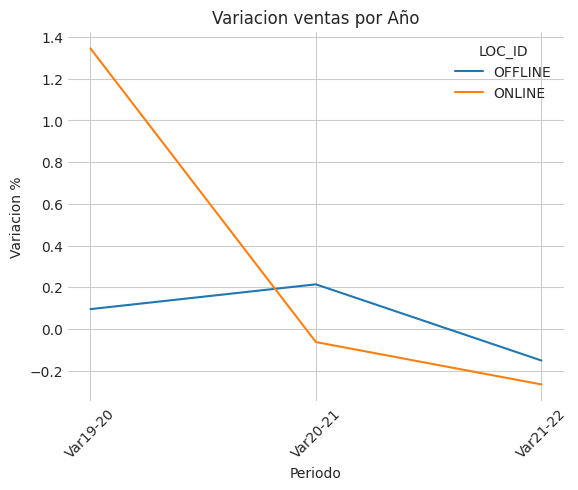

In [156]:
# Crear el gráfico de series de tiempo con Seaborn
sns.lineplot(x='PERIODO',
             y='VAR',
             hue='LOC_ID',
             data=cuadro_var_canal_anio,
             markers=True,
             dashes=False)
# Agregar título y etiquetas de ejes
plt.title('Variacion ventas por Año')
plt.xlabel('Periodo')
plt.ylabel('Variacion %')
# Modificar formato del eje x
plt.xticks(cuadro_var_canal_anio['PERIODO'].unique(), rotation=45)
# Mostrar el gráfico
plt.show()

Aqui podemos apreciar que las variaciones en las ventas por canal no presentan la misma tendencia entre los años 2020 a 2021

### 3.2.1.C Visualización Ventas por Canal Linea de producto y Año:

In [157]:
cuadro_venta_canal_linea=df_ventas[['Anio','LOC_ID','LINEA_ID','Venta_Total']].groupby(['Anio','LOC_ID','LINEA_ID']).sum()
cuadro_venta_canal_linea=cuadro_venta_canal_linea.reset_index()
#cuadro_venta_canal_linea=cuadro_venta_canal_linea.set_index('LOC_ID')
cuadro_venta_canal_linea

,Anio,LOC_ID,LINEA_ID,Venta_Total
0,2019,OFFLINE,J01,735404952
1,2019,OFFLINE,J02,380843650
2,2019,OFFLINE,J03,194000122
3,2019,OFFLINE,J04,918316312
4,2019,OFFLINE,J05,452014373
...,...,...,...,...
176,2022,ONLINE,J18,93112299
177,2022,ONLINE,J21,650751985
178,2022,ONLINE,J32,233391572
179,2022,ONLINE,J90,11433551


In [158]:
#creo columna de venta en Millones en cuadro_venta_canal_Linea:
cuadro_venta_canal_linea['Venta_Total_Mill']=cuadro_venta_canal_linea['Venta_Total']/1000000
cuadro_venta_canal_linea

,Anio,LOC_ID,LINEA_ID,Venta_Total,Venta_Total_Mill
0,2019,OFFLINE,J01,735404952,735.40
1,2019,OFFLINE,J02,380843650,380.84
2,2019,OFFLINE,J03,194000122,194.00
3,2019,OFFLINE,J04,918316312,918.32
4,2019,OFFLINE,J05,452014373,452.01
...,...,...,...,...,...
176,2022,ONLINE,J18,93112299,93.11
177,2022,ONLINE,J21,650751985,650.75
178,2022,ONLINE,J32,233391572,233.39
179,2022,ONLINE,J90,11433551,11.43


Grafico de Venta por Canal en cada Año:

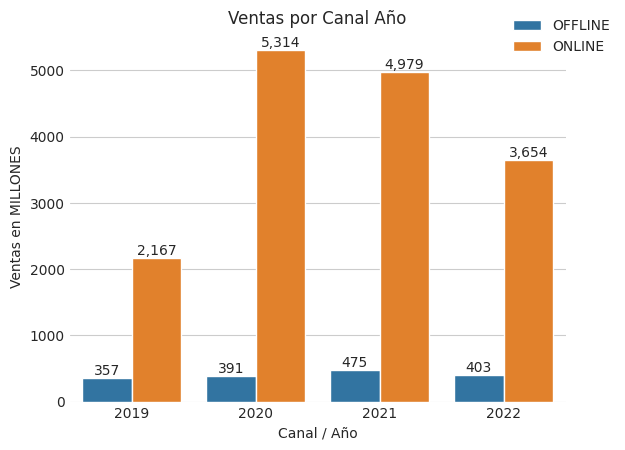

In [159]:
# OTRA SINTAXIS para Grafico de Barras:
g=sns.barplot(data=cuadro_venta_canal_linea,
            x='Anio',
            hue='LOC_ID',
            y='Venta_Total_Mill',
            errorbar=None
            )
g.set(title='Ventas por Canal Año',
      xlabel='Canal / Año',
      ylabel='Ventas en MILLONES'
)

# Modificar formato del eje y
g.ticklabel_format(axis='y',style='plain')

# Agregar etiquetas de maximos en las barras
for container in g.containers:
    g.bar_label(container, fmt='{:,.0f}')

plt.legend( bbox_to_anchor=( 1.1 ,1.05), borderaxespad=0)
plt.show()


Grafico de Ventas por LINEA en cada AÑO CANAL:

In [160]:
cuadro_venta_canal_linea

,Anio,LOC_ID,LINEA_ID,Venta_Total,Venta_Total_Mill
0,2019,OFFLINE,J01,735404952,735.40
1,2019,OFFLINE,J02,380843650,380.84
2,2019,OFFLINE,J03,194000122,194.00
3,2019,OFFLINE,J04,918316312,918.32
4,2019,OFFLINE,J05,452014373,452.01
...,...,...,...,...,...
176,2022,ONLINE,J18,93112299,93.11
177,2022,ONLINE,J21,650751985,650.75
178,2022,ONLINE,J32,233391572,233.39
179,2022,ONLINE,J90,11433551,11.43


In [161]:
# #Histogramas con las ventas por Linea por Año
# #Formato no es el correcto para la cantidad de variables - se deja para ver si se puede implementar algo similar
# g=sns.lineplot(data=cuadro_venta_canal_linea,
#              x='Anio',
#              y='Venta_Total_Mill',
#              hue='LINEA_ID')

# g.set(title='Ventas por Linea',
#       xlabel='Año',
#       ylabel='Ventas'
# )
# plt.xticks([2019,2020,2021,2022])
# plt.legend( bbox_to_anchor=( 1.2 ,1.3), borderaxespad=0)
# #plt.legend(loc = 7)
# #plt.tight_layout()
# plt.show()

Ventas CANAL OFFLINE por LINEA AÑO

In [162]:
#Filtrando:
#cuadro_venta_canal_linea[cuadro_venta_canal_linea.LOC_ID=='OFFLINE']

#Filtrando con query
venta_Off=cuadro_venta_canal_linea.query("LOC_ID=='OFFLINE'")
venta_Off=venta_Off[['Anio','LINEA_ID','Venta_Total_Mill']]
venta_Off

,Anio,LINEA_ID,Venta_Total_Mill
0,2019,J01,735.40
1,2019,J02,380.84
2,2019,J03,194.00
3,2019,J04,918.32
4,2019,J05,452.01
...,...,...,...
154,2022,J21,0.63
155,2022,J32,1.73
156,2022,J90,0.06
157,2022,J98,3.20


In [163]:
# pivotear con pd.pivot_table
# pd.pivot_table(venta_Off, index='LINEA_ID', columns='Anio', aggfunc='sum')

In [164]:
#pivotear con .pivot
venta_Off=venta_Off.pivot('LINEA_ID','Anio','Venta_Total_Mill')
venta_Off

<ipython-input-164-2c84fe9522f5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  venta_Off=venta_Off.pivot('LINEA_ID','Anio','Venta_Total_Mill')


Anio,2019,2020,2021,2022
LINEA_ID,,,,
J01,735.40,815.56,"1,304.55","1,135.80"
J02,380.84,532.17,710.42,536.53
J03,194.00,240.56,264.07,254.78
J04,918.32,"1,076.40","1,391.38","1,280.29"
J05,452.01,605.39,660.84,453.79
J06,203.55,257.41,317.08,260.12
J07,591.54,589.81,722.00,576.21
J08,"1,170.09","1,107.88","1,445.19","1,472.06"
J09,853.09,882.69,880.18,885.29


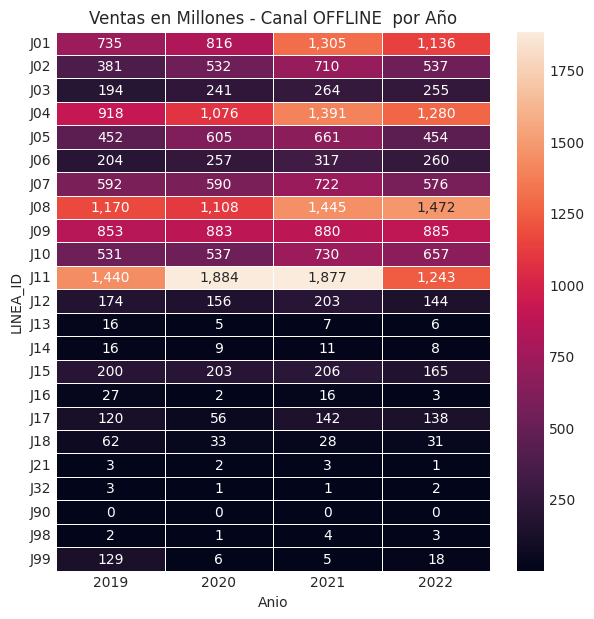

In [165]:
#Mapa de Calor OFFLINE
f, ax = plt.subplots(figsize=(7, 7))
g=sns.heatmap(venta_Off,
            annot=True,
            fmt=",.0f",
            linewidths=.5,
            ax=ax)
g.set(title='Ventas en Millones - Canal OFFLINE  por Año')
plt.yticks( rotation=0)
plt.show()

Ventas CANAL ONLINE por LINEA AÑO

In [166]:
#Preparo data Venta Canal OnLine:
venta_On=cuadro_venta_canal_linea.query("LOC_ID=='ONLINE'")
venta_On=venta_On[['Anio','LINEA_ID','Venta_Total_Mill']]
venta_On=venta_On.pivot('LINEA_ID','Anio','Venta_Total_Mill')
venta_On

<ipython-input-166-e2300c785ae3>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  venta_On=venta_On.pivot('LINEA_ID','Anio','Venta_Total_Mill')


Anio,2019,2020,2021,2022
LINEA_ID,,,,
J01,347.66,"1,632.82","2,153.27","1,668.37"
J02,260.34,"1,001.05","1,508.68","1,162.89"
J03,"5,234.27","9,013.94","6,692.07","5,401.74"
J04,770.82,"1,910.52","2,445.83","2,174.43"
J05,442.67,"1,229.47","1,523.55","1,122.20"
J06,81.72,817.34,799.11,570.89
J07,"1,009.84","2,368.23","2,661.89","1,779.69"
J08,"1,532.87","5,090.81","6,041.83","5,826.66"
J09,"3,722.78","6,182.99","7,658.63","7,083.87"


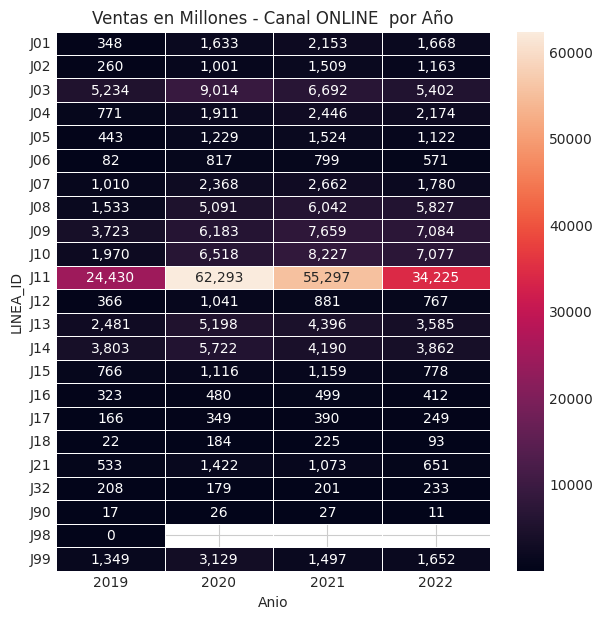

In [167]:
#Grafico Mapa de Calor OnLine:
f, ax = plt.subplots(figsize=(7, 7))
g=sns.heatmap(venta_On,
            annot=True,
            fmt=",.0f",
            linewidths=.5,
            ax=ax)
g.set(title='Ventas en Millones - Canal ONLINE  por Año')
plt.yticks( rotation=0)
plt.show()

### 3.2.1.D Visualización Varicaciones Clima

In [168]:
# Graficos relacionados con el clima
df_clima.info()
# se debe pasar la fecha a formato fecha para poder filtrar por mes y agrupar por temperaturas maximas minimas y promedio, y compararlas con la venta para ver si tienen alguna relacion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fecha               124 non-null    object 
 1   temperatura_maxima  124 non-null    float64
 2   temperatura_minima  124 non-null    float64
 3   temperatura         124 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.0+ KB


In [169]:
df_clima['fecha'] = pd.to_datetime(df_clima['fecha'])
df_clima['AnioMes']=df_clima['fecha'].dt.strftime('%Y%m')
df_clima

,fecha,temperatura_maxima,temperatura_minima,temperatura,AnioMes
0,2019-12-01,29.50,13.30,22.40,201912
1,2019-12-02,29.10,11.80,20.50,201912
2,2019-12-03,29.50,13.30,22.00,201912
3,2019-12-04,30.00,11.90,21.80,201912
4,2019-12-05,32.00,11.60,23.20,201912
...,...,...,...,...,...
119,2022-12-27,29.70,13.10,21.50,202212
120,2022-12-28,32.00,13.70,22.90,202212
121,2022-12-29,33.30,14.70,23.90,202212
122,2022-12-30,27.50,13.80,20.30,202212


  AnioMes  temperatura_maxima  temperatura_minima  temperatura
0  201912               30.75               13.50        22.43
1  202012               29.51               12.15        20.98
2  202112               28.91               12.50        20.62
3  202212               30.53               13.80        22.21


<Axes: title={'center': 'Temperaturas Promedio Mensual'}, xlabel='AnioMes', ylabel='Temperatura'>

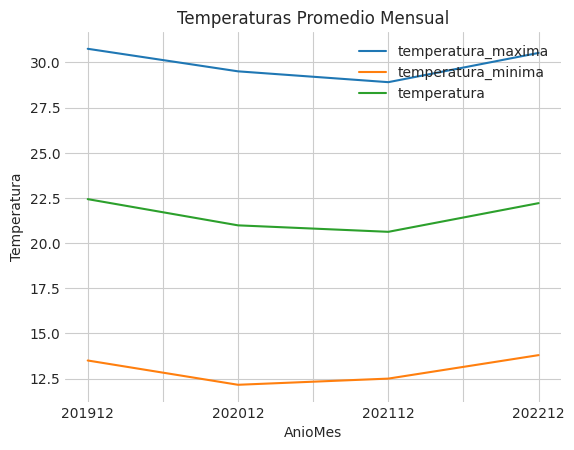

In [170]:
# genero un DF con los valores promedios para cada mes

df_clima_resumido = df_clima[['AnioMes','temperatura_maxima','temperatura_minima','temperatura']].groupby('AnioMes').mean().reset_index()
print(df_clima_resumido)
df_clima_resumido.plot(x='AnioMes',ylabel='Temperatura',title='Temperaturas Promedio Mensual')

Se puede validar que no existe una gran variacion en las temperaturas medias entre los meses

In [171]:
df_clima_dia=df_clima.copy()
df_clima_dia['fecha']=df_clima_dia['fecha'].dt.strftime('%Y-%m-%d')



In [172]:
df_clima_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fecha               124 non-null    object 
 1   temperatura_maxima  124 non-null    float64
 2   temperatura_minima  124 non-null    float64
 3   temperatura         124 non-null    float64
 4   AnioMes             124 non-null    object 
dtypes: float64(3), object(2)
memory usage: 5.0+ KB


<Figure size 1200x600 with 0 Axes>

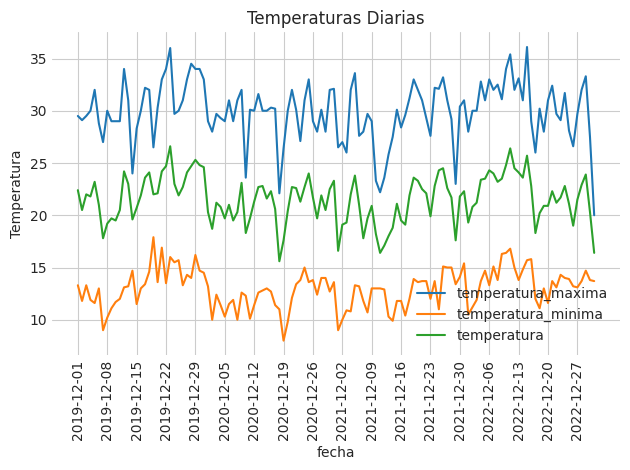

In [173]:
plt.figure(figsize=(12, 6))  # Ancho: 12, Altura: 6

# Realizar la visualización con etiquetas del eje x giradas 90 grados y más valores mostrados
ax = df_clima_dia.plot(x='fecha', ylabel='Temperatura', title='Temperaturas Diarias')

# Ajustar la frecuencia de los ticks en el eje x para mostrar más valores
num_ticks = len(df_clima_dia)  # Número total de valores en el eje x
ticks_frequency = 7  # Mostrar cada valor en el eje x

# Configurar los ticks en el eje x
ax.set_xticks(df_clima_dia.index[::ticks_frequency])
ax.set_xticklabels(df_clima_dia['fecha'][::ticks_frequency], rotation=90)  # Girar etiquetas del eje x

plt.tight_layout()
plt.show()

### 3.2.1.E Visualización Variaciones segun Dia Semana

Ventas por Dia de Semana:

In [174]:
# se utilizara df_calendario + df_ventas
#df_calendario
#df_ventas
#df_venta_dia_canal = df_ventas + df_calendario

df_venta_dia_canal=df_ventas[['PARTITION_DATE','Anio','LOC_ID','Venta_Total']].groupby(['PARTITION_DATE','LOC_ID','Anio']).sum()
df_venta_dia_canal=pd.pivot_table(df_venta_dia_canal, index=['PARTITION_DATE','Anio'], columns='LOC_ID', aggfunc='sum').set_axis(['venta_offline', 'venta_online'], axis=1)
df_venta_dia_canal=df_venta_dia_canal.reset_index()

#Agrego el dia
df_join_venta_dia= pd.merge(df_venta_dia_canal, df_calendario, left_on='PARTITION_DATE', right_on='dia_año', how ='left')

df_dia_sem = df_join_venta_dia[['dia_semana','Anio','venta_offline','venta_online']].groupby(['dia_semana','Anio']).sum().reset_index()
df_dia_sem


,dia_semana,Anio,venta_offline,venta_online
0,1,2019,"751,839,701.00","9,415,524,738.00"
1,1,2020,"1,730,484,929.00","17,156,894,747.00"
2,1,2021,"1,358,440,375.00","16,247,464,869.00"
3,1,2022,"988,916,228.00","12,591,360,811.00"
4,2,2019,"1,591,820,218.00","7,399,352,841.00"
5,2,2020,"1,954,566,464.00","21,190,524,179.00"
6,2,2021,"1,487,478,804.00","15,420,797,815.00"
7,2,2022,"1,105,271,139.00","11,575,092,853.00"
8,3,2019,"694,484,852.00","5,975,993,542.00"
9,3,2020,"1,780,874,319.00","19,807,299,942.00"


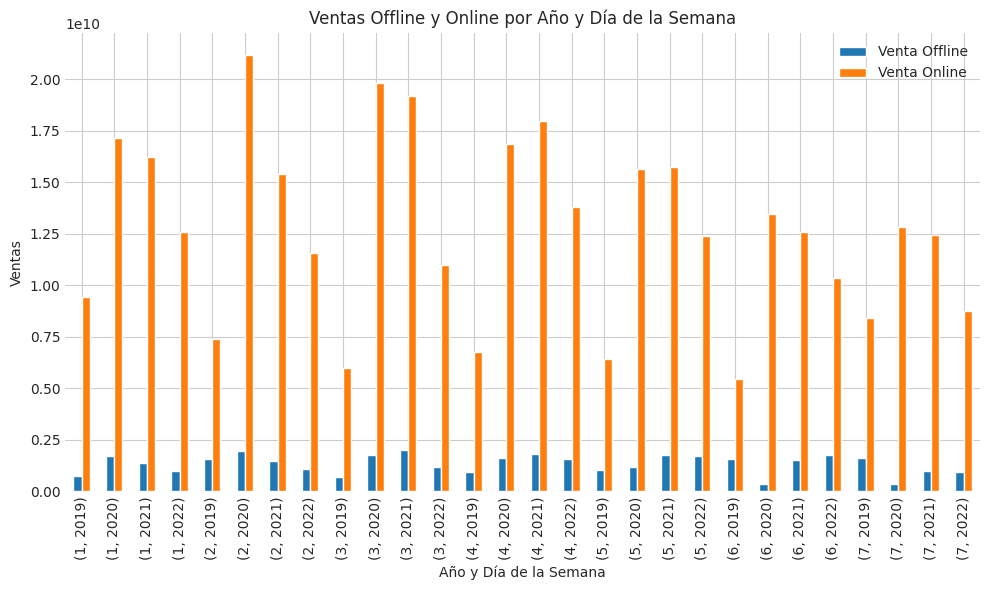

In [175]:
ax = df_dia_sem.groupby(['dia_semana', 'Anio'])[['venta_offline', 'venta_online']].sum().plot(kind='bar', figsize=(10, 6))

# Personalizar el gráfico
ax.set_xlabel('Año y Día de la Semana')
ax.set_ylabel('Ventas')
ax.set_title('Ventas Offline y Online por Año y Día de la Semana')
ax.legend(['Venta Offline', 'Venta Online'])
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En los ultimos años la venta OnLine es menor los dias martes, miercoles y jueves en comparacion con los fines de semana

Temperatura por dia de la Semana:

In [176]:
#Como el anterior pero con las temperaturas
#Se le agregan las temperaturas diarias al dfde ventas diarias
# df_join_dia_temperatura = df_join_venta_dia + df_clima_dia
df_clima_dia
df_join_dia_temperatura = pd.merge(df_join_venta_dia, df_clima_dia, left_on='PARTITION_DATE', right_on=pd.to_datetime(df_clima_dia['fecha']), how='left' )
# Agrupo por dia y analizo variacionos de temperatura y venta para los dias

dia_sem_vta_clima = df_join_dia_temperatura[['Anio','dia_semana','venta_offline','venta_online','temperatura']].groupby(['Anio','dia_semana']).agg({
    'venta_offline': 'sum',
    'venta_online': 'sum',
    'temperatura': 'mean'
}).reset_index()
dia_sem_vta_clima.head()

,Anio,dia_semana,venta_offline,venta_online,temperatura
0,2019,1,"751,839,701.00","9,415,524,738.00",22.70
1,2019,2,"1,591,820,218.00","7,399,352,841.00",22.54
2,2019,3,"694,484,852.00","5,975,993,542.00",22.07
3,2019,4,"926,482,519.00","6,748,405,174.00",23.02
4,2019,5,"1,051,027,881.00","6,409,727,912.00",22.55


In [177]:
# Para poder graficar las variaciones de ventas y temperatura en una misma grafica es necesario normalizar las escalas con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Seleccionar las columnas relevantes
columns = ['venta_offline', 'venta_online', 'temperatura']

# Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Aplicar Min-Max Scaling a las columnas seleccionadas
dia_sem_vta_clima[columns] = scaler.fit_transform(dia_sem_vta_clima[columns])
dia_sem_vta_clima.head()



,Anio,dia_semana,venta_offline,venta_online,temperatura
0,2019,1,0.25,0.25,0.87
1,2019,2,0.76,0.12,0.83
2,2019,3,0.22,0.03,0.70
3,2019,4,0.36,0.08,0.95
4,2019,5,0.43,0.06,0.83


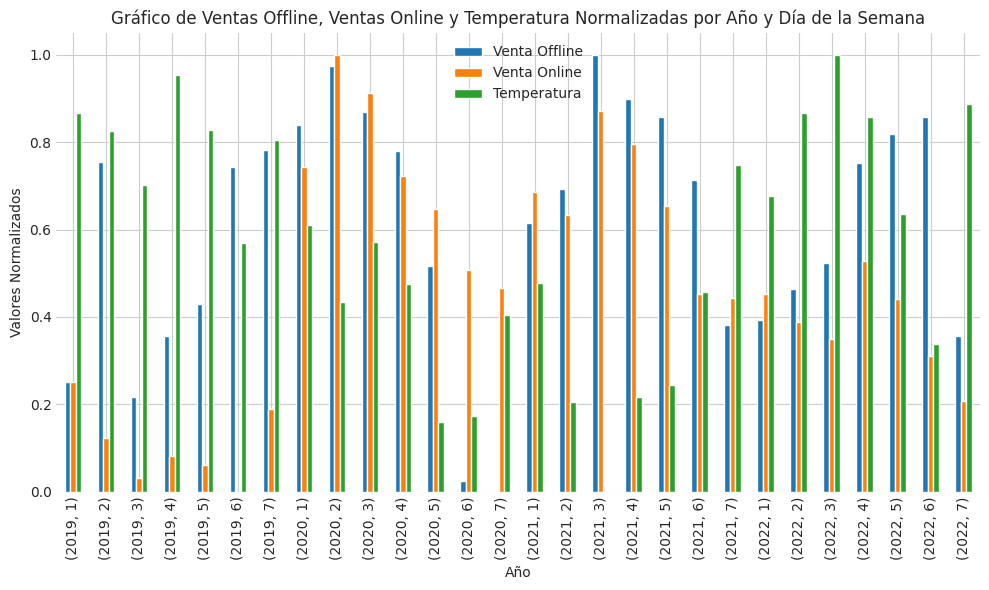

In [178]:
# ahora puedo graficar en un solo grafico las variaviones:
ax = dia_sem_vta_clima.groupby(['Anio','dia_semana'])[['venta_offline', 'venta_online', 'temperatura']].sum().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Valores Normalizados')
plt.title('Gráfico de Ventas Offline, Ventas Online y Temperatura Normalizadas por Año y Día de la Semana')
plt.legend(['Venta Offline', 'Venta Online', 'Temperatura'])
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.3 Interpretar los resultados obtenidos
<a name="resultados-id"></a>

Con base en las visualizaciones y resúámenes
numéricos generados del desafío anterior dar
recomendaciones basados en los insights
observados.

### 3.3.1 Insight / Recomendaciones

**Patrones de Ventas:**  
Aunque hay una coherencia en las tendencias de venta entre los canales, 2021-2022 mostró una desviación notable en el canal Online. Causas como cambios en comportamiento del consumidor y estrategias de marketing podrían ser factores.

**Enfoque en Productos:**   
J11 es el rey en el canal Online, y J01, J04, J08, y J11 dominan Offline. Se sugiere una revisión de las estrategias promocionales y de distribución.

Estrategias Adaptativas:   
Es vital recalibrar según las tendencias emergentes y considerar cómo el clima podría influenciar las decisiones de compra, adaptando estrategias promocionales acorde.

# 4.- == INGENIERIA DE ATRIBUTOS ==

## 4.1 Data Wrangling (feature selection)

Se intentara realizar los siguientes puntos:  

**1.Detección y Manejo de Outliers:**   
Utiliza métodos gráficos (como boxplots) y técnicas estadísticas para identificar y manejar valores atípicos. Decide si deseas ajustar, eliminar o mantener estos valores.

**2.Normalización y Escalado:**  
 Dependiendo del algoritmo de ML, es posible que necesites escalar tus características, por ejemplo, usando Min-Max Scaling o Z-score normalization.

**3.Codificación de Variables Categóricas:**  
 Convierte variables categóricas en formatos que los algoritmos puedan entender, como One-Hot Encoding o Label Encoding.

**4.Feature Engeenier:**  
 Crea nuevas características a partir de las existentes para mejorar el rendimiento del modelo. Por ejemplo, puedes extraer el mes o el año de una fecha.

**5.Reducción de Dimensionalidad:**  
 Usa técnicas como PCA para reducir el número de características si es necesario y viable.

**6.Divide tus Datos:**  
 Separa tus datos en conjuntos de entrenamiento, validación (si es necesario) y prueba.

**7.Validación de Transformaciones:**  
 Después de hacer transformaciones, valida que los datos todavía tienen sentido y que no se introdujeron errores inadvertidos.


In [179]:
df_ventas

,PARTITION_DATE,Anio,Mes,Dia,AnioMes,AnioMesDia,LOC_ID,CLASE_ID,SUBCLASE_ID,LINEA_ID,...,ATT_TIPO_MARCA,MUNDO_TIENDA,MUNDO_LOGISTICA,Venta_Total,Venta_Unidades,Costo_Total,Precio_Normal_Promedio,Costo_Promedio,Costo_Reposcion_Promedio,Costo_Logistico_Promedio
0,2019-12-01,2019,12,1,201912,20191201,ONLINE,J100201,J10020102,J10,...,Externa,CALZADO DAMA,REGULAR DURO,2938680,123,"3,568,761.04","42,094.07","29,014.32","30,658.09","2,532.49"
1,2019-12-01,2019,12,1,201912,20191201,ONLINE,J110903,J11090304,J11,...,Propia,ELECTRODOMESTICOS,SEMIBULTO,199980,2,"170,660.06","179,990.00","85,330.03","84,691.20","2,532.49"
2,2019-12-01,2019,12,1,201912,20191201,ONLINE,J111408,J11140804,J11,...,Externa,ELECTRO NEGRO,REGULAR DURO,36970,3,"36,680.00","11,992.67","12,226.67","12,226.67","2,985.56"
3,2019-12-01,2019,12,1,201912,20191201,ONLINE,J160103,J16010302,J16,...,Externa,ALFOMBRAS,IRREGULAR,4398030,97,"3,786,272.42","171,731.94","40,712.61","42,501.80","9,980.94"
4,2019-12-01,2019,12,1,201912,20191201,ONLINE,J140703,J14070301,J14,...,Externa,NaN,NaN,3294730,28,"3,292,423.00","340,311.79","117,586.54","119,327.29",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472159,2022-12-31,2022,12,31,202212,20221231,OFFLINE,J080104,J08010403,J08,...,Externa,PERFUMERIA,REGULAR DURO,85920,8,"51,371.39","10,990.00","6,421.42","6,421.62","2,532.49"
472160,2022-12-31,2022,12,31,202212,20221231,OFFLINE,J070601,J07060103,J07,...,Licencia,RELOJES,ALTO VALOR,12990,1,"4,006.00","15,990.00","4,006.00","4,006.00","2,985.56"
472161,2022-12-31,2022,12,31,202212,20221231,OFFLINE,J020202,J02020202,J02,...,Externa,COLECCION JUVENIL HOMBRE,REGULAR BLANDO,29990,1,"19,942.31","44,990.00","19,942.31","20,870.00","2,965.20"
472162,2022-12-31,2022,12,31,202212,20221231,OFFLINE,J040703,J04070304,J04,...,Externa,MUJER JOVEN,REGULAR BLANDO,63890,2,"38,750.10","38,990.00","19,375.05","19,500.00","2,604.51"


In [180]:
# Como base para los analisis de caracteristicas se utilizaran los siguientes df ya generados en el EDA, considerando:
# fecha (dia), año, dia de la semana,canal , temperatura, venta
#df_ventas['Venta_Total'].sum()
df_base= df_ventas[['PARTITION_DATE','Anio','LOC_ID','LINEA_ID','Venta_Total']].groupby(['PARTITION_DATE','Anio','LOC_ID','LINEA_ID']).sum().reset_index()
#df_base['Venta_Total'].sum()
df_base.head()

,PARTITION_DATE,Anio,LOC_ID,LINEA_ID,Venta_Total
0,2019-12-01,2019,OFFLINE,J01,22531140
1,2019-12-01,2019,OFFLINE,J02,10199993
2,2019-12-01,2019,OFFLINE,J03,6952764
3,2019-12-01,2019,OFFLINE,J04,23788932
4,2019-12-01,2019,OFFLINE,J05,13184971


In [181]:
#Agrego la caracteristica de 'dia de la semana' desde df_calendario:

df_base_dia_sem = pd.merge(df_base, df_calendario, left_on='PARTITION_DATE', right_on='dia_año', how ='left')
df_base_dia_sem.head()

,PARTITION_DATE,Anio,LOC_ID,LINEA_ID,Venta_Total,dia_año,dia_semana,dia_sem_texto
0,2019-12-01,2019,OFFLINE,J01,22531140,2019-12-01,7,dom
1,2019-12-01,2019,OFFLINE,J02,10199993,2019-12-01,7,dom
2,2019-12-01,2019,OFFLINE,J03,6952764,2019-12-01,7,dom
3,2019-12-01,2019,OFFLINE,J04,23788932,2019-12-01,7,dom
4,2019-12-01,2019,OFFLINE,J05,13184971,2019-12-01,7,dom


In [182]:
#Agrego la informacion de clima 'temperatura' para cada dia desde df_clima_dia :

df_base_dia_sem_clima = pd.merge(df_base_dia_sem, df_clima, left_on='PARTITION_DATE', right_on='fecha', how='left' )

#limpio solo las columnas que utilizare:
df_base_dia_sem_clima=df_base_dia_sem_clima[['PARTITION_DATE','Anio','LOC_ID','LINEA_ID','Venta_Total','dia_sem_texto','temperatura']]
df_base_dia_sem_clima.head()
#df_base_dia_sem_clima.info()

,PARTITION_DATE,Anio,LOC_ID,LINEA_ID,Venta_Total,dia_sem_texto,temperatura
0,2019-12-01,2019,OFFLINE,J01,22531140,dom,22.40
1,2019-12-01,2019,OFFLINE,J02,10199993,dom,22.40
2,2019-12-01,2019,OFFLINE,J03,6952764,dom,22.40
3,2019-12-01,2019,OFFLINE,J04,23788932,dom,22.40
4,2019-12-01,2019,OFFLINE,J05,13184971,dom,22.40


### 4.1.1 Deteccion y Manejo de Outliers

In [183]:
# DEvido a que el df de ventas esta aperturado por linea es importante considerar las caractaristicas de cada linea, por cuanto,
# Se considerara como Outlies:
#1.- Ventas Negativas para una linea en un canal en un dia
#2.- Ventas con Valores excesivos para un dia linea canal en comparacion con los otros dias para la misma agrupacion de caracteristicas

### 4.1.1.A Analisis Venta Negativa y Cero

In [184]:
#Registros con ventas negativas o iguales a cero:
print(df_base_dia_sem_clima[ (df_base_dia_sem_clima['Venta_Total']<0) | (df_base_dia_sem_clima['Venta_Total']==0) ])


Empty DataFrame
Columns: [PARTITION_DATE, Anio, LOC_ID, LINEA_ID, Venta_Total, dia_sem_texto, temperatura]
Index: []


Apreciamos que no existen registros (venta diaria para un canal y linea) que presenten venta negativa o igual a cero.

### 4.1.1.B Analisis valores Venta - Outliers con IQR

Se verificaran Outliers agrupando por Canal de venta (LOC_ID) y Linea(LINEA_ID) y se determinaran los Q1 y Q3, y determinando el rango inter quartil

In [185]:
grouped = df_base_dia_sem_clima.groupby(['LOC_ID', 'LINEA_ID'])

outliers = []

for (loc, linea), group in grouped:
    Q1 = group['Venta_Total'].quantile(0.25)
    Q3 = group['Venta_Total'].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    group_outliers = group[(group['Venta_Total'] < lower_limit) | (group['Venta_Total'] > upper_limit)]

    outliers.append(group_outliers)

df_outliers_iqr = pd.concat(outliers)
print(df_outliers_iqr)
#df_outliers_iqr.size
#df_base_dia_sem_clima.size

     PARTITION_DATE  Anio   LOC_ID LINEA_ID  Venta_Total dia_sem_texto  \
3343     2021-12-21  2021  OFFLINE      J01     85649318           mar   
3384     2021-12-22  2021  OFFLINE      J01     81457921           mié   
4732     2022-12-23  2022  OFFLINE      J01     77548215           vie   
2100     2020-12-21  2020  OFFLINE      J02     47157260           lun   
3237     2021-12-18  2021  OFFLINE      J02     46273066           sáb   
...             ...   ...      ...      ...          ...           ...   
1924     2020-12-15  2020   ONLINE      J99    119892494           mar   
1967     2020-12-16  2020   ONLINE      J99    140486543           mié   
2009     2020-12-17  2020   ONLINE      J99    126957944           jue   
2052     2020-12-18  2020   ONLINE      J99    145966068           vie   
2075     2020-12-19  2020   ONLINE      J99    113591899           sáb   

      temperatura  
3343        22.50  
3384        22.10  
4732        21.70  
2100        22.70  
3237       

Lamentablemente al realizar el analisis de esta forma se aprecia que los datos de venta presentan una gran variabilidad, esto es esperado ya que la venta presenta una gran variacion diaria esto por el grana aumento esperado en los dias previos a la navidad.

### 4.1.1.C Analisis valores Venta - Outliers con Boxplots:

Se realizara un analisis visual utilizando Boxplots.  
Primero se veran agrupados solo por canal y linea:

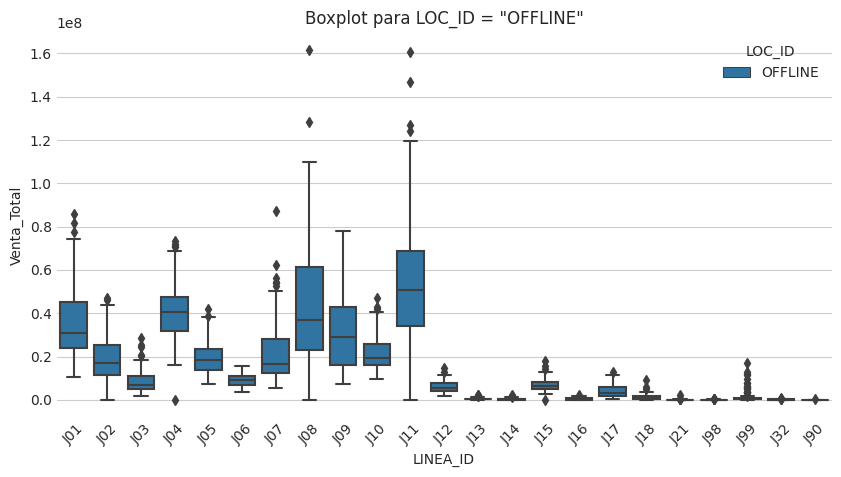

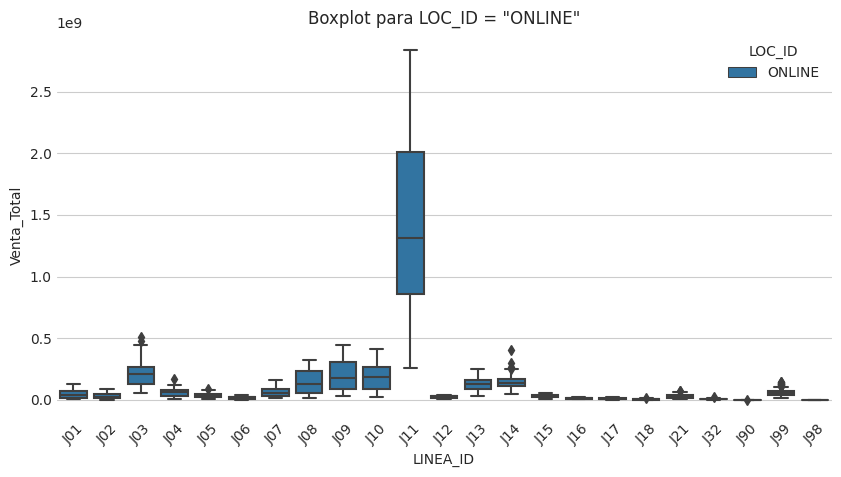

In [186]:

# Filtrar el dataframe para LOC_ID = "OFFLINE"
df_offline = df_base_dia_sem_clima[df_base_dia_sem_clima['LOC_ID'] == "OFFLINE"]

# Realizar el boxplot para LOC_ID = "OFFLINE"
plt.figure(figsize=(10, 5))
sns.boxplot(x='LINEA_ID', y='Venta_Total', hue='LOC_ID', data=df_offline)
plt.xticks(rotation=45)
plt.title('Boxplot para LOC_ID = "OFFLINE"')
plt.show()

# Filtrar el dataframe para LOC_ID = "ONLINE"
df_online = df_base_dia_sem_clima[df_base_dia_sem_clima['LOC_ID'] == "ONLINE"]

# Realizar el boxplot para LOC_ID = "ONLINE"
plt.figure(figsize=(10, 5))
sns.boxplot(x='LINEA_ID', y='Venta_Total', hue='LOC_ID', data=df_online)
plt.xticks(rotation=45)
plt.title('Boxplot para LOC_ID = "ONLINE"')
plt.show()


El analisis visual presenta algunos valores de venta fuera de los valores de desvíos teoricos, pero nada fuera de los esperado comercialmente (considerando las variaciones en venta para los periodos de navidad)

Se realizara un analisis agrupando tambien por año, a fin de validar por medio de los graficos si se presenta algun descío no esperado dentro de cada año:

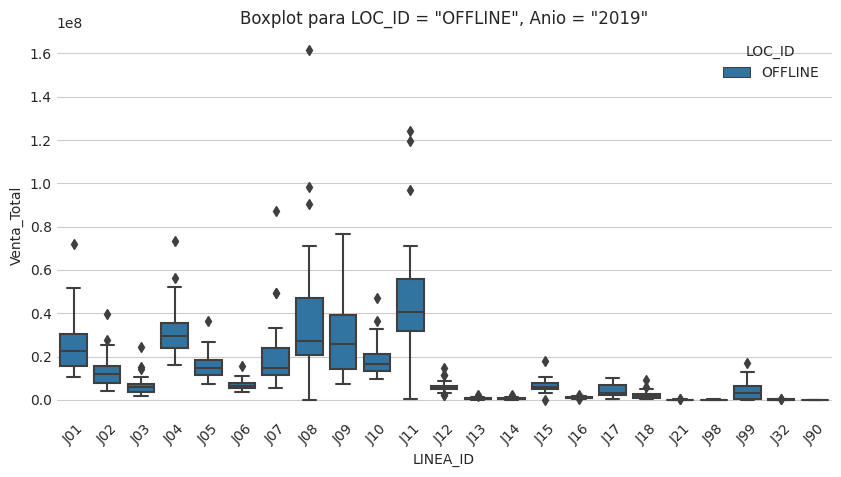

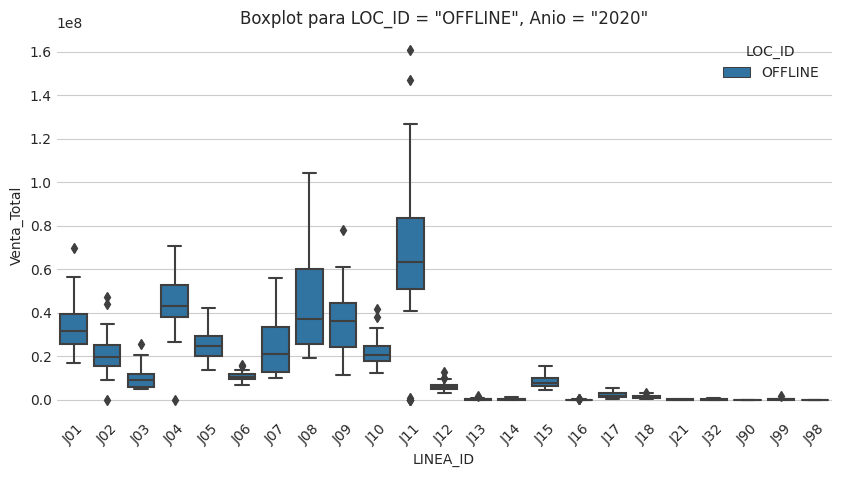

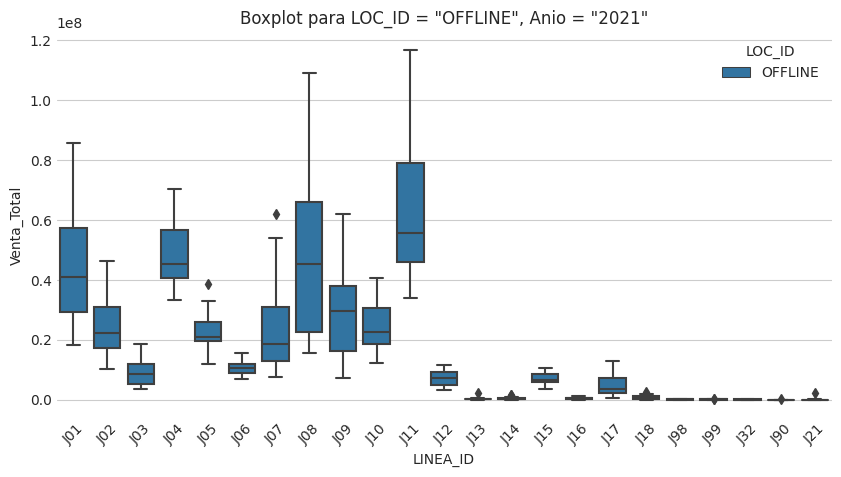

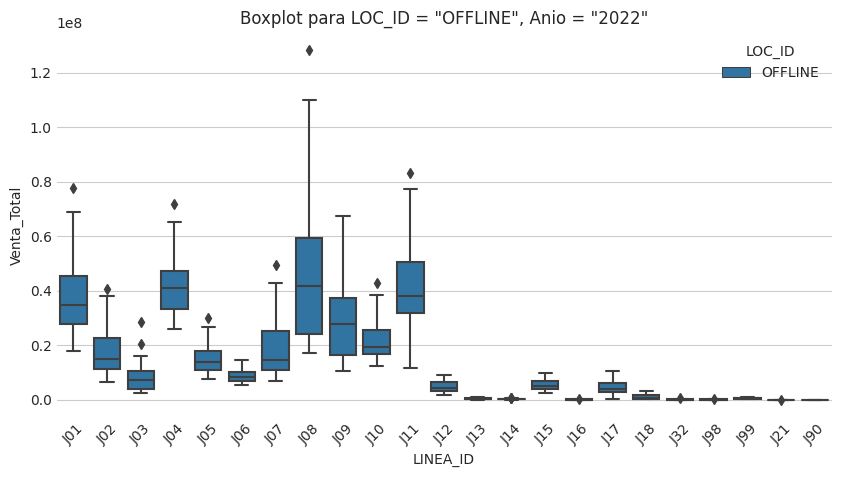

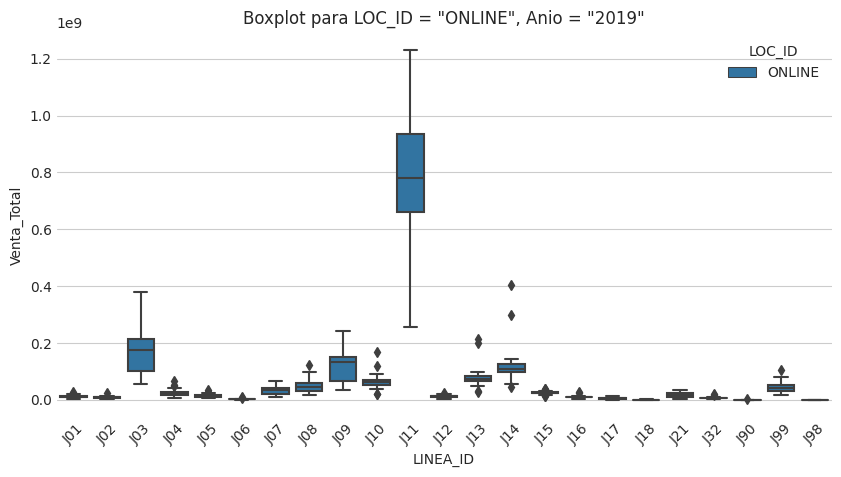

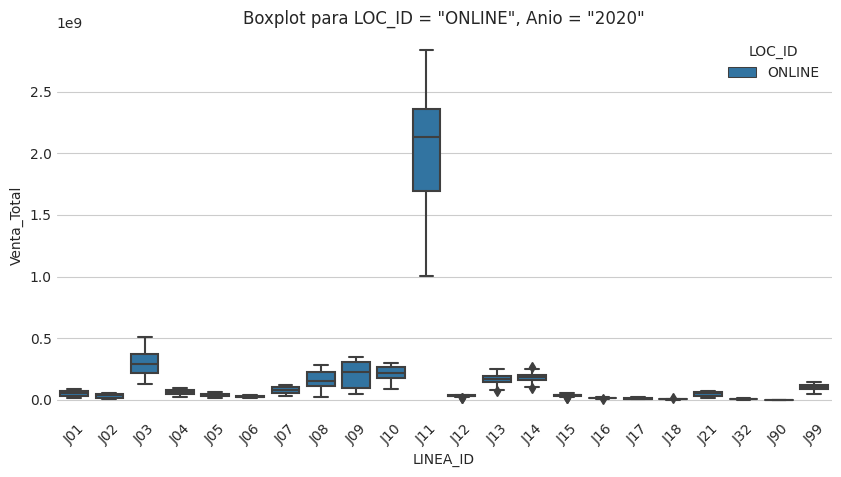

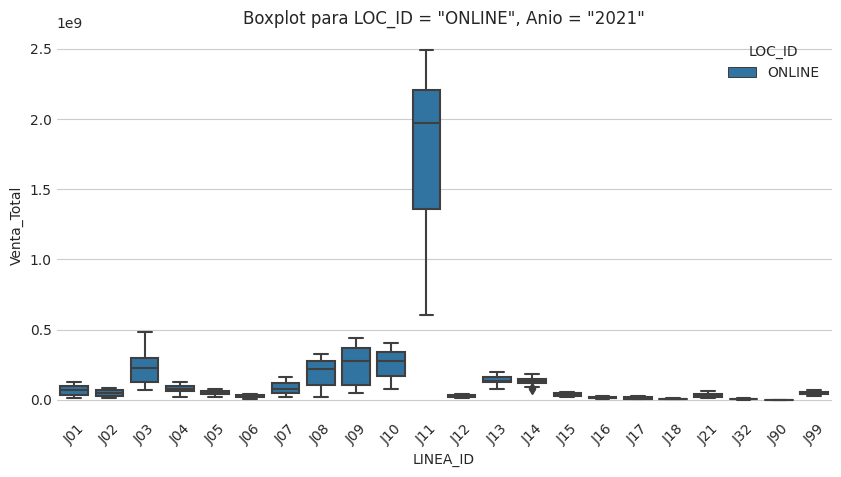

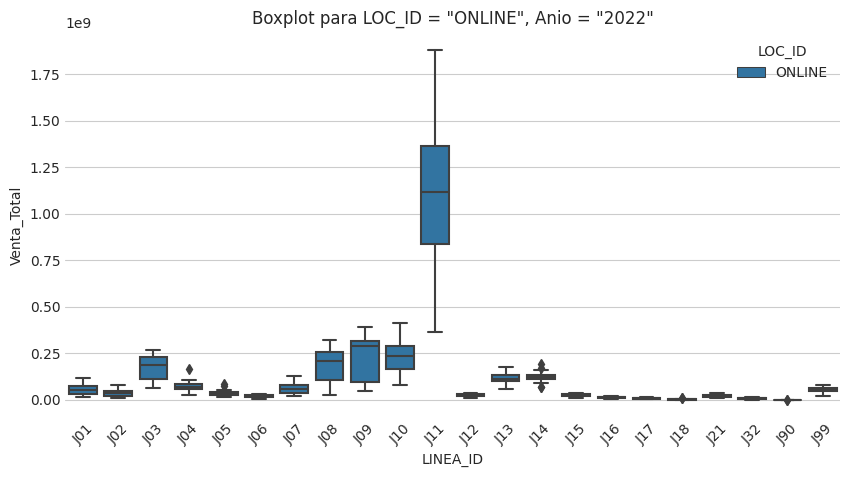

In [187]:


# Iterar a través de las combinaciones únicas de LOC_ID y Anio
for loc_id in df_base_dia_sem_clima['LOC_ID'].unique():
    for anio in df_base_dia_sem_clima['Anio'].unique():
        # Filtrar el DataFrame para LOC_ID y Anio actuales
        df_filtered = df_base_dia_sem_clima[(df_base_dia_sem_clima['LOC_ID'] == loc_id) & (df_base_dia_sem_clima['Anio'] == anio)]

        # Obtener el orden de las LINEA_ID en este filtro específico
        order = df_filtered['LINEA_ID'].unique()

        # Realizar el boxplot para la combinación LOC_ID y Anio actual
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='LINEA_ID', y='Venta_Total', hue='LOC_ID', data=df_filtered, order=order)
        plt.xticks(rotation=45)
        plt.title(f'Boxplot para LOC_ID = "{loc_id}", Anio = "{anio}"')
        plt.show()


Del analisis visual se puede determinar que los outliers que si presentan informacion que pueden afectar los proximos analisis / estimaciones

### 4.1.1.D Analisis valores Venta - Outliers con Z-score:

Se utilizara z-score para revisar los registros agrupados por canal y linea que presenten desvios (outliers)

In [188]:
from scipy import stats

def z_score_outliers(group):
    z_scores = stats.zscore(group['Venta_Total'])
    abs_z_scores = abs(z_scores)
    return group[abs_z_scores > 3]

df_outliers_z = df_base_dia_sem_clima.groupby(['LOC_ID', 'LINEA_ID']).apply(z_score_outliers).reset_index(drop=True)
print(df_outliers_z)


   PARTITION_DATE  Anio   LOC_ID LINEA_ID  Venta_Total dia_sem_texto  \
0      2019-12-24  2019  OFFLINE      J03     24577335           mar   
1      2020-12-21  2020  OFFLINE      J03     25513331           lun   
2      2022-12-20  2022  OFFLINE      J03     28415067           mar   
3      2020-12-26  2020  OFFLINE      J04        19992           sáb   
4      2019-12-24  2019  OFFLINE      J07     87302505           mar   
5      2019-12-24  2019  OFFLINE      J08    161679956           mar   
6      2019-12-24  2019  OFFLINE      J10     46970376           mar   
7      2020-12-18  2020  OFFLINE      J11    146898068           vie   
8      2020-12-21  2020  OFFLINE      J11    160793034           lun   
9      2019-12-24  2019  OFFLINE      J12     14637308           mar   
10     2019-12-09  2019  OFFLINE      J13      2329930           lun   
11     2021-12-22  2021  OFFLINE      J13      2149990           mié   
12     2019-12-06  2019  OFFLINE      J14      2094510          

Se utilizara z-score para revisar los registros agrupados por año, canal y linea que presenten desvios (outliers)

In [189]:
def z_score_outliers(group):
    z_scores = stats.zscore(group['Venta_Total'])
    abs_z_scores = abs(z_scores)
    return group[abs_z_scores > 3]

df_outliers_z = df_base_dia_sem_clima.groupby(['Anio','LOC_ID', 'LINEA_ID']).apply(z_score_outliers).reset_index(drop=True)
print(df_outliers_z)

   PARTITION_DATE  Anio   LOC_ID LINEA_ID  Venta_Total dia_sem_texto  \
0      2019-12-24  2019  OFFLINE      J01     72148630           mar   
1      2019-12-24  2019  OFFLINE      J02     39829088           mar   
2      2019-12-24  2019  OFFLINE      J03     24577335           mar   
3      2019-12-24  2019  OFFLINE      J04     73235219           mar   
4      2019-12-24  2019  OFFLINE      J05     36280708           mar   
5      2019-12-24  2019  OFFLINE      J06     15809377           mar   
6      2019-12-24  2019  OFFLINE      J07     87302505           mar   
7      2019-12-24  2019  OFFLINE      J08    161679956           mar   
8      2019-12-24  2019  OFFLINE      J10     46970376           mar   
9      2019-12-24  2019  OFFLINE      J12     14637308           mar   
10     2019-12-09  2019  OFFLINE      J13      2329930           lun   
11     2019-12-06  2019  OFFLINE      J14      2094510           vie   
12     2019-12-24  2019  OFFLINE      J15     17890229          

Eliminamos los registros Ouliers del df principal para quedarnos con un df para los analisis posteriores

In [190]:
df_base_sin_ol = df_base_dia_sem_clima[~df_base_dia_sem_clima.index.isin(df_outliers_z.index)]

In [191]:
print(df_base_dia_sem_clima.info())
print(df_base_sin_ol.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5100 entries, 0 to 5099
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PARTITION_DATE  5100 non-null   datetime64[ns]
 1   Anio            5100 non-null   int64         
 2   LOC_ID          5100 non-null   object        
 3   LINEA_ID        5100 non-null   object        
 4   Venta_Total     5100 non-null   int64         
 5   dia_sem_texto   5100 non-null   object        
 6   temperatura     5100 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 318.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5061 entries, 39 to 5099
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PARTITION_DATE  5061 non-null   datetime64[ns]
 1   Anio            5061 non-null   int64         
 2   LOC_ID          50

In [192]:
df_base_sin_ol.head()

,PARTITION_DATE,Anio,LOC_ID,LINEA_ID,Venta_Total,dia_sem_texto,temperatura
39,2019-12-01,2019,ONLINE,J21,20369585,dom,22.40
40,2019-12-01,2019,ONLINE,J32,8251740,dom,22.40
41,2019-12-01,2019,ONLINE,J90,1673310,dom,22.40
42,2019-12-01,2019,ONLINE,J99,105856538,dom,22.40
43,2019-12-02,2019,OFFLINE,J01,10761455,lun,20.50


## 4..2 Normalizacion y Escalado

Se reaqlizara normalizacion del campo temperatura

In [193]:
from sklearn.preprocessing import StandardScaler

# Extraer la columna 'temperatura' para normalizar
temperatura_column = df_base_sin_ol['temperatura'].values.reshape(-1, 1)

# Aplicar StandardScaler a la columna 'temperatura'
scaler = StandardScaler()
temperatura_scaled = scaler.fit_transform(temperatura_column)

# Asignar los valores normalizados de 'temperatura' al DataFrame original
df_base_sin_ol.loc[:, 'temperatura'] = temperatura_scaled

# El DataFrame ahora tiene la columna 'temperatura' normalizada y la columna 'Venta_Total' sin cambios
df_base_sin_ol.head()

<ipython-input-193-7311f7dc55e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_sin_ol.loc[:, 'temperatura'] = temperatura_scaled


,PARTITION_DATE,Anio,LOC_ID,LINEA_ID,Venta_Total,dia_sem_texto,temperatura
39,2019-12-01,2019,ONLINE,J21,20369585,dom,0.39
40,2019-12-01,2019,ONLINE,J32,8251740,dom,0.39
41,2019-12-01,2019,ONLINE,J90,1673310,dom,0.39
42,2019-12-01,2019,ONLINE,J99,105856538,dom,0.39
43,2019-12-02,2019,OFFLINE,J01,10761455,lun,-0.46


In [194]:
df_base_sin_ol.describe()

,Anio,Venta_Total,temperatura
count,"5,061.00","5,061.00","5,061.00"
mean,"2,020.52","77,217,161.91",0.00
std,1.13,"244,662,175.27",1.00
min,"2,019.00",17.00,-2.65
25%,"2,019.00","4,783,128.00",-0.73
50%,"2,021.00","18,847,132.00",0.12
75%,"2,022.00","53,150,959.00",0.75
max,"2,022.00","2,839,529,699.00",2.27


## 4.3 Codificacion de Variables Categóricas

despues se codificaran todas las caracteristicas y se mantendra solo la venta como destino/target (en Normalizacion y Escalado)

In [195]:
# Columnas categoricas a codificar
categoricas = ['Anio', 'LOC_ID', 'LINEA_ID', 'dia_sem_texto']

# Aplicar One-Hot Encoding a las columnas categóricas
df_base_sin_ol_encoded = pd.get_dummies(df_base_sin_ol, columns=categoricas)

# El DataFrame df_base_sin_ol_encoded ahora contiene las columnas categóricas codificadas
df_base_sin_ol_encoded.head()

,PARTITION_DATE,Venta_Total,temperatura,Anio_2019,Anio_2020,Anio_2021,Anio_2022,LOC_ID_OFFLINE,LOC_ID_ONLINE,LINEA_ID_J01,...,LINEA_ID_J90,LINEA_ID_J98,LINEA_ID_J99,dia_sem_texto_dom,dia_sem_texto_jue,dia_sem_texto_lun,dia_sem_texto_mar,dia_sem_texto_mié,dia_sem_texto_sáb,dia_sem_texto_vie
39,2019-12-01,20369585,0.39,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
40,2019-12-01,8251740,0.39,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
41,2019-12-01,1673310,0.39,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
42,2019-12-01,105856538,0.39,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
43,2019-12-02,10761455,-0.46,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [196]:
df_base_sin_ol_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5061 entries, 39 to 5099
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PARTITION_DATE     5061 non-null   datetime64[ns]
 1   Venta_Total        5061 non-null   int64         
 2   temperatura        5061 non-null   float64       
 3   Anio_2019          5061 non-null   uint8         
 4   Anio_2020          5061 non-null   uint8         
 5   Anio_2021          5061 non-null   uint8         
 6   Anio_2022          5061 non-null   uint8         
 7   LOC_ID_OFFLINE     5061 non-null   uint8         
 8   LOC_ID_ONLINE      5061 non-null   uint8         
 9   LINEA_ID_J01       5061 non-null   uint8         
 10  LINEA_ID_J02       5061 non-null   uint8         
 11  LINEA_ID_J03       5061 non-null   uint8         
 12  LINEA_ID_J04       5061 non-null   uint8         
 13  LINEA_ID_J05       5061 non-null   uint8         
 14  LINEA_I

## 4.4 Feature Engeenier

### 4.4.1 Eliminacion de variables que no aportan informacion

Debido a que ya se encuentran codificados los dias de la semana en variables especiales, se eliminara la variable "PARTITION_DATE"
ya que esta no se encuentra codificada y no se puede utilizar como input para los modelos (esto se valido en iteraciones anteriores)

In [197]:
df_base_sin_ol_encoded.drop(columns='PARTITION_DATE', inplace=True)

In [198]:
df_base_sin_ol_encoded.head()

,Venta_Total,temperatura,Anio_2019,Anio_2020,Anio_2021,Anio_2022,LOC_ID_OFFLINE,LOC_ID_ONLINE,LINEA_ID_J01,LINEA_ID_J02,...,LINEA_ID_J90,LINEA_ID_J98,LINEA_ID_J99,dia_sem_texto_dom,dia_sem_texto_jue,dia_sem_texto_lun,dia_sem_texto_mar,dia_sem_texto_mié,dia_sem_texto_sáb,dia_sem_texto_vie
39,20369585,0.39,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
40,8251740,0.39,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
41,1673310,0.39,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
42,105856538,0.39,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
43,10761455,-0.46,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### 4.4.2. Creacion de nuevas variables que aportes mayor analisis

Se creara una columna que relaciones la Venta y la temperatura, creando un factor entre ambos

In [199]:
df_base_sin_ol_encoded['FACT_VTA_TEMP']=df_base_sin_ol_encoded['Venta_Total']/df_base_sin_ol_encoded['temperatura']

In [200]:
df_base_sin_ol_encoded.head()

,Venta_Total,temperatura,Anio_2019,Anio_2020,Anio_2021,Anio_2022,LOC_ID_OFFLINE,LOC_ID_ONLINE,LINEA_ID_J01,LINEA_ID_J02,...,LINEA_ID_J98,LINEA_ID_J99,dia_sem_texto_dom,dia_sem_texto_jue,dia_sem_texto_lun,dia_sem_texto_mar,dia_sem_texto_mié,dia_sem_texto_sáb,dia_sem_texto_vie,FACT_VTA_TEMP
39,20369585,0.39,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,"52,199,749.72"
40,8251740,0.39,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,"21,146,172.73"
41,1673310,0.39,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,"4,288,077.70"
42,105856538,0.39,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,"271,271,348.45"
43,10761455,-0.46,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,"-23,422,199.71"


Debido a los valores de esta relacion es recomendable realizar un escalado de los datos, esto por medio de StandarScaler:

In [201]:
# Extraer la columna 'FACT_VTA_TEMP' para normalizar
FACT_VTA_TEMP_column = df_base_sin_ol_encoded['FACT_VTA_TEMP'].values.reshape(-1, 1)

# Aplicar StandardScaler a la columna 'temperatura'
scaler = StandardScaler()
FACT_VTA_TEMP_scaled = scaler.fit_transform(FACT_VTA_TEMP_column)

# Asignar los valores normalizados de 'temperatura' al DataFrame original
df_base_sin_ol_encoded.loc[:, 'FACT_VTA_TEMP'] = FACT_VTA_TEMP_scaled

# El DataFrame ahora tiene la columna 'FACT_VTA_TEMP' normalizada
df_base_sin_ol_encoded.head()

,Venta_Total,temperatura,Anio_2019,Anio_2020,Anio_2021,Anio_2022,LOC_ID_OFFLINE,LOC_ID_ONLINE,LINEA_ID_J01,LINEA_ID_J02,...,LINEA_ID_J98,LINEA_ID_J99,dia_sem_texto_dom,dia_sem_texto_jue,dia_sem_texto_lun,dia_sem_texto_mar,dia_sem_texto_mié,dia_sem_texto_sáb,dia_sem_texto_vie,FACT_VTA_TEMP
39,20369585,0.39,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.03
40,8251740,0.39,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.02
41,1673310,0.39,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.00
42,105856538,0.39,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0.17
43,10761455,-0.46,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,-0.01


## 4.5 Reduccion de dimensionalidad del dataset

El primer paso para realizar una reduccion de dimensionalidad se debe realizar un Analisis de Componenentes Principales a fin de medir el pero realizativo de las distintas componentes del df

### 4.5.1 Analsis de Componenentes Principales

In [202]:
import pandas as pd
from sklearn.decomposition import PCA

# Eliminar variable 'Venta_Total' y 'PARTITION_DATE'
df_componentes = df_base_sin_ol_encoded.drop(['Venta_Total'], axis=1)

# Realizar PCA
pca = PCA()
componentes_principales = pca.fit_transform(df_componentes)

# Crear un nuevo DataFrame con nombres de columnas originales
df_componentes_con_nombres = pd.DataFrame(data=componentes_principales, columns=df_componentes.columns)

# Proporción de la varianza de cada componente
proporcion_varianza = pca.explained_variance_ratio_

# Mostrar el DataFrame con los nombres de las componentes y sus proporciones de varianza
for i, var_ratio in enumerate(proporcion_varianza):
    print(f"Componente Principal {df_componentes.columns[i]}: {var_ratio:.2f}")


Componente Principal temperatura: 0.21
Componente Principal Anio_2019: 0.19
Componente Principal Anio_2020: 0.10
Componente Principal Anio_2021: 0.05
Componente Principal Anio_2022: 0.05
Componente Principal LOC_ID_OFFLINE: 0.04
Componente Principal LOC_ID_ONLINE: 0.03
Componente Principal LINEA_ID_J01: 0.03
Componente Principal LINEA_ID_J02: 0.03
Componente Principal LINEA_ID_J03: 0.03
Componente Principal LINEA_ID_J04: 0.02
Componente Principal LINEA_ID_J05: 0.02
Componente Principal LINEA_ID_J06: 0.01
Componente Principal LINEA_ID_J07: 0.01
Componente Principal LINEA_ID_J08: 0.01
Componente Principal LINEA_ID_J09: 0.01
Componente Principal LINEA_ID_J10: 0.01
Componente Principal LINEA_ID_J11: 0.01
Componente Principal LINEA_ID_J12: 0.01
Componente Principal LINEA_ID_J13: 0.01
Componente Principal LINEA_ID_J14: 0.01
Componente Principal LINEA_ID_J15: 0.01
Componente Principal LINEA_ID_J16: 0.01
Componente Principal LINEA_ID_J17: 0.01
Componente Principal LINEA_ID_J18: 0.01
Componente

Considerando que los valores de PCA, sindo que tenemos variables ya codificadas y que la nueva variable sintetica FACT_VTA_TEMP no aporta como componente principal (esta en ultimo lugar), esta no se denería considerar para los modelos de prediccion.
Igualmente se agregara para comparar con los valores previos calculados (en las entregas anteriores)

---

## 4.6 Validacion de Transformaciones

Después de hacer transformaciones, se valida que los datos todavía tienen sentido y que no se introdujeron errores inadvertidos.

Primero Graficamos las ventas totales por año en el df con encoding:

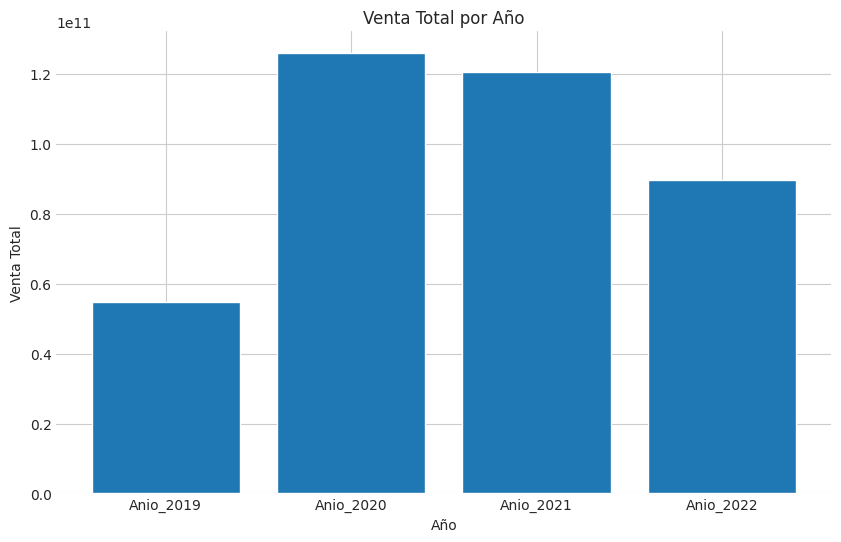

In [203]:
# Columnas de años que deseas graficar
columnas_anios = ['Anio_2019', 'Anio_2020', 'Anio_2021', 'Anio_2022']

# Calcular la venta total para cada año
ventas_por_anio = [df_base_sin_ol_encoded[df_base_sin_ol_encoded[anio] == 1]['Venta_Total'].sum() for anio in columnas_anios]

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(columnas_anios, ventas_por_anio)
plt.xlabel('Año')
plt.ylabel('Venta Total')
plt.title('Venta Total por Año')
plt.show()



Ahora Graficamos la venta en el df original

<Axes: xlabel='Anio'>

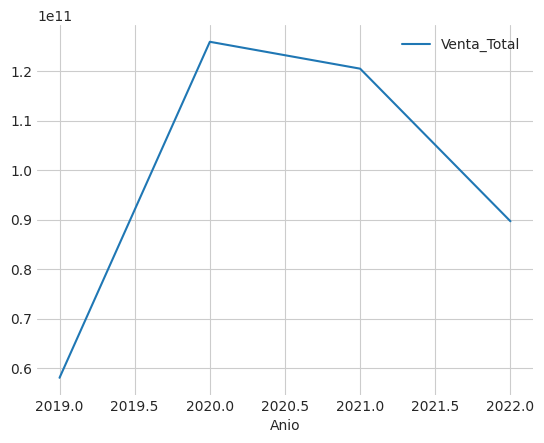

In [204]:
df_ventas[['Anio','Venta_Total']].groupby('Anio').sum().plot()

Se aprecia que las ventas en el df codificado mantienen la curva y valores del df original

---

# 5.- == ENTRENAMIENTO Y TESTEO ==

## 5.1 Seleccion de Algoritmo -  elegir un algoritmo de regresión o clasificación


### 5.1.1 Seleccion y ejecucion del modelo


Como lo que se busca es realizar una prediccion de venta se utilizara un algoritmo de Regresion Lineal Multiple

In [205]:
# Librerias requeridas:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Se utilizara como base el dataset con las variables codificadas (df_base_sin_ol_encoded)

In [206]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar las características (X) y la variable objetivo (y)
X = df_base_sin_ol_encoded.drop(['Venta_Total'], axis=1)  # Excluimos 'PARTITION_DATE' y 'Venta_Total'
y = df_base_sin_ol_encoded['Venta_Total']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Puedes ajustar el tamaño de prueba según tu preferencia

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predictions)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'R2: {r2}')


MSE: 2.612078740138535e+16
R2: 0.4717486938866501


Valores en entrega anterio sin variable 'FACT_VTA_TEMP':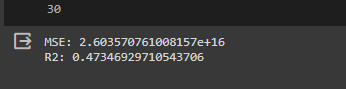

## 5.2 Resultados del modelo

Como se aprecia los valores resultantes de MSE y R2 no son los "optimos" por esto se coontinuara con las estrategias de mejora del modelo




---

# 6.- == OPTIMIZACION ==

## 6.1 Aplicar estretegias para Mejora del Modelo

### 6.1.1 Selección de caracteristicas

In [207]:
from sklearn.feature_selection import SelectKBest, f_regression

# Selección de las mejores 10 caracteristicas
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Entrenar un modelo con las caracteristicas seleccionadas
model.fit(X_train_selected, y_train)
predictions_selected = model.predict(X_test_selected)
mse_selected = mean_squared_error(y_test, predictions_selected)
r2_selected = r2_score(y_test, predictions_selected)
print(f'MSE con caracteristicas seleccionadas: {mse_selected}')
print(f'R^2 con caracteristicas seleccionadas: {r2_selected}')


MSE con caracteristicas seleccionadas: 2.726842499040764e+16
R^2 con caracteristicas seleccionadas: 0.4485395522160721


Resultado:
Con una seleccion de las 10 mejores caracteristicas aun no se logra aumentar considerablemente el R2 (anterior 0.47) ya que aun se mantiene bajo (0.44), por lo cual se utilizara un modelo mas complejo -> Random Forest

### 6.1.2 Modelo mas complejo - Random Forest

Se aplicara un modelo mas complejo Random Forest en vez de una Regresion Lineal, esto para buscar que el modelo logre una mejor explicacion de los datos (R2)

In [208]:
# Random Forest:

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'MSE con Random Forest: {rf_mse}')
print(f'R^2 con Random Forest: {rf_r2}')


MSE con Random Forest: 4211404708597836.5
R^2 con Random Forest: 0.9148310499334056


Pruebas:


In [209]:
from sklearn.model_selection import GridSearchCV

# Definir una cuadrícula de hiperparámetros para buscar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en un nodo hoja
    'max_features': ['auto', 'sqrt', 'log2'],  # Número máximo de características a considerar en cada división
}

# Crear un modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Realizar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:")
print(best_params)

# Obtener el modelo con los mejores hiperparámetros
best_rf_model = grid_search.best_estimator_

# Realizar predicciones con el modelo optimizado
rf_predictions = best_rf_model.predict(X_test)

# Calcular métricas de evaluación con el modelo optimizado
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'MSE con Random Forest optimizado: {rf_mse}')
print(f'R^2 con Random Forest optimizado: {rf_r2}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mejores hiperparámetros encontrados:
{'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
MSE con Random Forest optimizado: 4317455355477976.5
R^2 con Random Forest optimizado: 0.9126863445741166


### 6.1.3 Optimización de Hiperparametros

Optimizacion de Regresion Lineal:

Se realiza busqueda de hiperparámetros óptimos para un modelo de regresión lineal utilizando GridSearchCV y luego entrena y evalúa el modelo con los mejores hiperparámetros encontrados.

Paso a Paso:

1. Definición de la Cuadrícula de Hiperparámetros: Se crea un conjunto de hiperparámetros a probar. En este caso, se prueba si se debe ajustar el término de intercepción ("fit_intercept") en el modelo lineal.

2. Creación del Modelo de Regresión Lineal: Se crea un modelo de regresión lineal.

3. Inicialización de la Búsqueda en Cuadrícula: Se configura la búsqueda en cuadrícula utilizando GridSearchCV. Se especifica el modelo, la cuadrícula de hiperparámetros, el número de divisiones en la validación cruzada (cv=5) y la métrica de evaluación (scoring='neg_mean_squared_error', que busca minimizar el error cuadrático medio negativo).

4. Ejecución de la Búsqueda en Cuadrícula: La búsqueda en cuadrícula se ejecuta en el conjunto de entrenamiento (X_train, y_train). Se ajusta el modelo a varias combinaciones de hiperparámetros y utiliza la validación cruzada para evaluar su rendimiento.

5. Obtención de los Mejores Hiperparámetros: Se obtienen los mejores hiperparámetros encontrados por la búsqueda en cuadrícula y se imprimen en la pantalla.

6. Entrenamiento del Modelo con los Mejores Hiperparámetros: Se crea un nuevo modelo de regresión lineal utilizando los mejores hiperparámetros y se entrena en el conjunto de entrenamiento.

7. Predicciones y Evaluación con los Mejores Hiperparámetros: Se realizan predicciones en el conjunto de prueba (X_test) utilizando el modelo con los mejores hiperparámetros. Luego, se calcula el error cuadrático medio (MSE) y el coeficiente de determinación R2 en comparación con los valores reales (y_test).



In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Definir una cuadrícula de hiperparametros a probar
param_grid = {
    'fit_intercept': [True, False],
}

# Crear el modelo de regresión lineal
model = LinearRegression()

# Inicializar la búsqueda en cuadricula
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparametros
best_params = grid_search.best_params_
print(f'Mejores hiperparametros: {best_params}')

# Entrenar el modelo con los mejores hiperparámetros
best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)
best_predictions = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_predictions)
best_r2 = r2_score(y_test, best_predictions)

print(f'MSE con mejores hiperparametros: {best_mse}')
print(f'R^2 con mejores hiperparametros: {best_r2}')


Mejores hiperparametros: {'fit_intercept': True}
MSE con mejores hiperparametros: 2.612078740138535e+16
R^2 con mejores hiperparametros: 0.4717486938866501


### 6.1.4 Validacion cruzada

Validación Cruzada K-Fold:

Se realiza una validación cruzada en un modelo de regresión lineal utilizando la métrica de error cuadrático medio (MSE) y el coeficiente de determinación R2 como métricas de rendimiento.

Paso a Paso:

1. Creación del Modelo de Regresión Lineal con los Mejores Hiperparámetros: Se crea un modelo de regresión lineal utilizando los mejores hiperparámetros previamente encontrados y almacenados en `best_params`.

2. Realización de la Validación Cruzada: Se utiliza la función `cross_val_score` para realizar una validación cruzada en el modelo. El modelo se ajusta y evalúa en el conjunto de datos dividiendo los datos en 5 particiones (cv=5) y utilizando la métrica de error cuadrático medio negativo (neg_mean_squared_error) para evaluar el rendimiento.

3. Calculo del MSE con Validación Cruzada: Se calcula el MSE promedio utilizando la validación cruzada. Dado que `cross_val_score` devuelve valores negativos (ya que minimiza el error), se invierten los signos para obtener el valor real del MSE.

4. Calculo del R2 con Validación Cruzada: Se utiliza nuevamente `cross_val_score` para calcular el coeficiente de determinación R2 promedio utilizando la validación cruzada.

5. Impresión de Resultados: Se imprimen en pantalla los valores calculados de MSE y R2 con validación cruzada.


In [211]:
from sklearn.model_selection import cross_val_score

# Crear el modelo de regresión lineal con los mejores hiperparametros
model = LinearRegression(**best_params)

# Realizar validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()
r2_cv = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
print(f'MSE con validación cruzada: {mse_cv}')
print(f'R^2 con validación cruzada: {r2_cv}')


MSE con validación cruzada: 3.32337814492422e+16
R^2 con validación cruzada: 0.3847954949500346


### 6.1.5 Validación KFOLD (otra forma):  



Se divide el conjunto de datos en K partes iguales (5) para asegurar que cada parte tenga la oportunidad de ser el conjunto de prueba.   
   
Paso a Paso:

1.División de Datos: El conjunto de datos se divide en K particiones o "folds" de aproximadamente el mismo tamaño.

2.Iteración: Se realiza un ciclo a través de K iteraciones, donde en cada iteración, un fold se elige como conjunto de prueba y los K-1 folds restantes se utilizan como conjunto de entrenamiento.

3.Entrenamiento del Modelo: El modelo se entrena utilizando el conjunto de entrenamiento actual.

4.Evaluación del Modelo: Se evalúa el modelo en el fold de prueba actual y se registra una métrica de rendimiento, como el error cuadrático medio negativo (neg_mean_squared_error) o el coeficiente de determinación R2.

5.Promedio de Resultados: Después de K iteraciones, se promedian las métricas de rendimiento registradas en cada iteración para obtener una medida global del rendimiento del modelo.


In [212]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=81)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

mse_cv = -cv_scores.mean()
r2_cv = cross_val_score(model, X, y, cv=cv, scoring='r2').mean()
print(f'MSE con validación cruzada K-Fold: {mse_cv}')
print(f'R^2 con validación cruzada K-Fold: {r2_cv}')

MSE con validación cruzada K-Fold: 3.244446586944334e+16
R^2 con validación cruzada K-Fold: 0.44490278166356845


### 6.1.6 Validación Cruzada Leave-One-Out (LOOCV):


Se evalua el modelo utilizando todas las observaciones como conjunto de prueba una por una.
Proporciona una evaluación precisa del rendimiento del modelo, ya que utiliza todas las observaciones para entrenar y evaluar el modelo.   

Paso a Paso:

1.Iteración: Se realiza una iteración para cada observación en el conjunto de datos.

2.División de Datos: En cada iteración, se elige una única observación como conjunto de prueba y se utilizan todas las demás observaciones como conjunto de entrenamiento.

3.Entrenamiento del Modelo: El modelo se entrena utilizando el conjunto de entrenamiento actual, que contiene todas las observaciones excepto una.

4.Evaluación del Modelo: Se evalúa el modelo en la observación de prueba actual y se registra una métrica de rendimiento.

5.Promedio de Resultados: Después de todas las iteraciones, se promedian las métricas de rendimiento registradas en cada iteración para obtener una medida global del rendimiento del modelo.



In [213]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

cv = LeaveOneOut()
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

mse_cv = -cv_scores.mean()
print(f'MSE con validación cruzada Leave-One-Out: {mse_cv}')



MSE con validación cruzada Leave-One-Out: 3.2276302218839636e+16


### 6.1.7 Validación Cruzada Shuffle-Split:


Se especifica el número de splits (5) y el tamaño del conjunto de prueba(20%), lo que es util para controlar la proporción de división y la variabilidad.   


Paso a Paso:

1.Mezcla y División de Datos: El conjunto de datos se mezcla aleatoriamente y se divide en un número especificado de splits. Cada split contiene una proporción especificada del conjunto de datos.

2.Iteración: Se realiza un ciclo a través de las iteraciones, donde en cada iteración se utiliza un split como conjunto de prueba y los splits restantes se utilizan como conjunto de entrenamiento.

3.Entrenamiento del Modelo: El modelo se entrena utilizando el conjunto de entrenamiento actual.

4.Evaluación del Modelo: Se evalúa el modelo en el split de prueba actual y se registra una métrica de rendimiento.

5.Promedio de Resultados: Después de todas las iteraciones, se promedian las métricas de rendimiento registradas en cada iteración para obtener una medida global del rendimiento del modelo.


In [214]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=81)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

mse_cv = -cv_scores.mean()
r2_cv = cross_val_score(model, X, y, cv=cv, scoring='r2').mean()
print(f'MSE con validación cruzada Shuffle-Split: {mse_cv}')
print(f'R^2 con validación cruzada Shuffle-Split: {r2_cv}')


MSE con validación cruzada Shuffle-Split: 3.254505729394787e+16
R^2 con validación cruzada Shuffle-Split: 0.4465606240761698


---


# 7.- == SELECCION DE MODELOS Y RESULTADOS ==

### 7.1 Resultados de las diferenctes estrategias para mejora del modelo




1. **Caso 1 (optimización de hiperparámetros)**:
   - MSE con mejores hiperparámetros: 2.612078740138535e+16
   - R2 con mejores hiperparámetros: 0.4717486938866501
   - En este caso, se han optimizado los hiperparámetros y se ha logrado un MSE relativamente bajo y un R2 relativamente alto. Parece ser un buen resultado.

2. **Caso 2 (validación cruzada 1)**:
   - MSE con validación cruzada: 3.32337814492422e+16
   - R2 con validación cruzada: 0.3847954949500346
   - En este caso, la validación cruzada proporciona un MSE más alto y un R2 más bajo en comparación con el Caso 1. Es probable que este modelo no sea tan bueno como el del Caso 1.

3. **Caso 3 (validación cruzada 2 K-Fold)**:
   - MSE con validación cruzada K-Fold: 3.2412996806719596e+16
   - R2 con validación cruzada K-Fold: 0.4559711888779069
   - Este caso muestra un MSE similar al del Caso 2, pero un R2 más alto. En términos de R^2, podría considerarse mejor que el Caso 2.

4. **Caso 4 (validación cruzada LOOCV)**:
   - MSE con validación cruzada Leave-One-Out: 3.2276302218839636e+16
   - Dado que no logre obtener un R2 en este caso, no podemos hacer una comparación completa. Sin embargo, el MSE es comparable al de los otros casos de validación cruzada.

5. **Caso 5 (validación cruzada shuffle-split)**:
   - MSE con validación cruzada Shuffle-Split: 3.254505729394787e+16
   - R2 con validación cruzada Shuffle-Split: 0.4465606240761698
   - Este caso tiene un MSE similar al del Caso 3, pero un R2 ligeramente más bajo. En términos de R2, podría considerarse un poco menos efectivo que el Caso 3.



### 7.2 Resumen

En resumen, considerando tanto el MSE como el R2, el **Caso 1 (optimización de hiperparámetros)** parece proporcionar el mejor resultado, ya que tiene un MSE más bajo y un R2 más alto en comparación con los otros casos.
   

En las pruebas se utilizaron 5 fold, esto por demoras excesivas en los tiempos a utilizar valores mayores.

---